<a id='beginning'></a>

# Рынок заведений общественного питания Москвы

## Описание проекта:

Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?
Вы — гуру аналитики, и партнёры просят вас подготовить исследование рынка. У вас есть открытые данные о заведениях общественного питания в Москве.

## Содержание проекта:
- [Шаг 1. Загрузка данных и подготовка их к анализу](#step_1);
- [Шаг 2. Анализ данных](#step_2);
- [Шаг 3. Подготовка презентации](#step_3).

## Файлы с данными:
- `rest_data.csv` содержит данные о заведениях общественного питания Москвы.

## Описание данных:

Таблица `rest_data`:

- `id` — идентификатор объекта;
- `object_name` — название объекта общественного питания;
- `chain` — сетевой ресторан;
- `object_type` — тип объекта общественного питания;
- `address` — адрес;
- `number` — количество посадочных мест.

## Имопорт необходимых для работы библиотек.

In [73]:
import requests
import re
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import scipy.stats as stats
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from pymystem3 import Mystem
from termcolor import colored
from collections import Counter
from plotly import graph_objects as go
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## Объявление глобальных переменных и функций.

[К шагу 1](#step_1)

In [74]:
global district_info_dict

district_info_dict              = {}
pd.options.display.max_colwidth = 1000
pd.options.display.max_rows     = 1000
top_ten_streets_url             = 'https://getfile.dokpub.com/yandex/get/https://yadi.sk/d/PCKVZisUMGPF5A'
district_info_url               = 'https://getfile.dokpub.com/yandex/get/https://yadi.sk/d/rCyTDFgnbOhMzg'
# Значения словаря - пути до папки с рабочими файлами, ключи значения от 1 до 3, в соответствии с местом 
# выполнения проекта: Дом / Работа / Облако yandex prakticum.
PATH_TO_FOLDER_DICT = {1        : 'C:\\Users\\ASUS\\Desktop\\Yandex prakticum\\project_9\\',
                       2        : 'C:\\Users\\ShadrinAV\\Desktop\\Yandex prakticum\\project_9\\',
                       3        : '/datasets/',
                       'driver' : {1:'C:\\Users\\ASUS\\Desktop\\Yandex prakticum\\selenium_driver\\chromedriver.exe',
                                   2:'C:\\Users\\ShadrinAV\\Desktop\\Yandex prakticum\\selenium_driver\\chromedriver.exe'}
                      }

# Данные для замены названий получены при исследованиях ниже, но, что бы не занимать место и не портить читабельность
# перемещены сюда.
to_replace  =  ['fridays', 'fridays kfc', 'krispy krem', 'prime прайм стар', 'prime прайм стар прайм-кафе',
                'prime star прайм стар','starbucks coffee','starbucks кофе','starbucks старбакс','starbucks, старбакс кофе',
                'travelers coffe', 'tutti frutti','upside down', 'van wok ванвок', 'vanwok ванвок','coffeeshop','paul поль',
                'torro grill торро гриль','il forno иль форно','goodman гудман','vietcafe вьеткафе',
                'white rabbite (белый кролик)','стейк хаус гудман','ресторан гудман','стейк-хаус гудман','баскин роббинс',
                'бургер клаб','кофешоп coffeeshop company','кофикс','коста кофе','данкин донатс','маки маки','старбакс',
                'ванвок','воккер','братья караваевы','братья караваевых','бб энд бургерс b&b бургер',
                'бб энд бургерс в&в бургер','да пино (da pino)','японской кухни маки маки','чайхона тапчан',
                'старина мюллер старина миллер', 'мята', 'кулинарное бюро китчен','в&в бургер','суши бар маки маки',
                'суши маки маки','суши вок','икеа ikea','кондитерская тирольские пироги', 'магбургер азс №17',
                'магбургер азс №16', 'предприятие быстрого обслуживания магбургер']

replace_with = ['tgi fridays', 'tgi fridays', 'krispy creme', 'прайм стар', 'прайм стар', 'прайм стар','starbucks',
                'starbucks', 'starbucks', 'starbucks', 'travelers coffee','tutti frutti frozen yogurt','upside down cake',
                'van wok','van wok','coffeeshop company','поль','торро гриль','иль форно','гудман','вьеткафе','белый кролик',
                'гудман','гудман','гудман','baskin robbins','burger club','coffeeshop company','cofix','costa coffee',
                'dunkin donuts','maki maki','starbucks','van wok','wokker','кулинарная лавка братьев караваевых',
                'кулинарная лавка братьев караваевых','b&b бургер','b&b бургер','da pino', 'маки маки', 'тапчан',
                'старина мюллер', 'мята lounge', 'кулинарное бюро kitcen','b&b бургер', 'маки маки', 'маки маки','суши wok',
                'ikea','тирольские пироги', 'магбургер', 'магбургер', 'магбургер']
vilages      = ['деревня Бунчиха','посёлок Акулово','деревня Лапшинка','посёлок Ульяновского Лесопарка', 'село Вороново',
                'посёлок Шишкин Лес','посёлок Совхоза "Крёкшино"','посёлок Щапово','деревня Троицкое','деревня Сосенки',
                'деревня Овечкино','посёлок Газопровод','деревня Дудкино']

def refresh_object_type_for_plot (df):
    df['object_type_for_plot'] = df['object_type'].copy()
    df['object_type_for_plot'].replace('предприятие быстрого обслуживания',
                                       'предприятие\nбыстрого обслуживания', inplace=True)
    df['object_type_for_plot'].replace('предприятие\nбыстрого обслуживания',
                                       'предприятие\nбыстрого\nобслуживания', inplace=True)
    df['object_type_for_plot'].replace('магазин (отдел кулинарии)', 'магазин\n(отдел кулинарии)', inplace=True)
    df['object_type_for_plot'].replace('магазин\n(отдел кулинарии)', 'магазин\n(отдел\nкулинарии)', inplace=True)
    
def split_address(string):
    split_string = string.split(', ')
    for address in split_string:
        if 'улица' in address.lower():
            return(', '.join(split_string[split_string.index(address):]))
        if 'проспект' in address.lower():
            return(', '.join(split_string[split_string.index(address):]))
        if 'шоссе' in address.lower():
            return(', '.join(split_string[split_string.index(address):]))
        if 'проезд' in address.lower():
            return(', '.join(split_string[split_string.index(address):]))
        if 'бульвар' in address.lower():
            return(', '.join(split_string[split_string.index(address):]))
        if 'переулок' in address.lower():
            return(', '.join(split_string[split_string.index(address):]))
        if 'набережная' in address.lower():
            return(', '.join(split_string[split_string.index(address):]))
        if 'площадь' in address.lower():
            return(', '.join(split_string[split_string.index(address):]))
        if 'Зеленоград' in address and 'корпус' in string.lower():
            return(', '.join(split_string[split_string.index(address):]))
        if 'микрорайон' in address.lower():
            return(', '.join(split_string[split_string.index(address):]))
        if 'аллея' in address.lower():
            return(', '.join(split_string[split_string.index(address):]))
        if 'Московской Кольцевой Автодороги' in address or 'МКАД' in address:
            return('МКАД')
        if 'территория' in address.lower():
            return(', '.join(split_string[split_string.index(address):]))
        if 'квартал' in address.lower():
            return(', '.join(split_string[split_string.index(address):]))
        if 'тупик' in address.lower():
            return(', '.join(split_string[split_string.index(address):]))
        if 'линия' in address.lower():
            return(', '.join(split_string[split_string.index(address):]))
        if 'Саларьево' in address or 'Воскресенское' in address or 'Ватутинки' in address:
            return(', '.join(split_string[split_string.index(address):]))
        if address in vilages:
            return(', '.join(split_string[split_string.index(address):]))
        
def rotate_km (string):
    split_string = string.split(' ')
    if split_string[0][:1].isdigit():
        join_string  = split_string[2:4] + split_string[0:2] + split_string[4:]
        join_string  = ' '.join(join_string)
        join_string  = join_string.replace('кого', 'кое')
        join_string  = join_string.replace(' километр', '-й километр,')
        join_string  = join_string.replace('-й-й', '-й')
        return(join_string)
    else:
        return(string) 

def district_definition (request):
    yandex_links      = []
    driver = webdriver.Chrome(executable_path=PATH_TO_FOLDER_DICT['driver'][work_place])
    driver.get("http://www.yandex.ru")
    assert "Яндекс" in driver.title
    search_box = driver.find_element_by_name('text')
    search_box.send_keys(request+' moscowmap')
    search_box.submit()
    assert "Яндекс" in driver.title
    element = driver.find_element_by_xpath("/html/body/div[3]/div[1]/div[2]")
    hrefs   = [x.get_attribute('href') for x in element.find_elements_by_css_selector('a')]
    for href in hrefs:
        if 'www.moscowmap.ru/streets' in href:
            yandex_links.append(href)
    link = yandex_links[0]
    driver.get(link)
    element = driver.find_element_by_class_name('t-content-2column-main')
    hrefs   = [x.get_attribute('href') for x in element.find_elements_by_css_selector('a')]
    hrefs   = hrefs[1:11]
    for href in hrefs:
        if 'okruga' in href:        
            distr_dict.setdefault(request, {})
            if len(href.split("/")) == 6:
                distr_dict[request].setdefault(href.split("/")[-1][:-5], href.split("/")[-2])
    driver.close()    
    
def district_info_def (address):
    '''Для ускорения процесса, функция возвращает нужную часть ответа google geocoding api
    обработка и разбор компанентов на необходимые значения производится в датафрейме ''' 
    
    address = address.replace(',','').replace(' ','+')
    r       = requests.get('https://maps.googleapis.com/maps/api/geocode/json?address=' + address
                                                                                        + '&language=ru&key='
                                                                                        + API_KEY)
    try:
        return(r.json()['results'][0]['address_components'])
    except:
        return('не найдено') 
    
def address_translit(text):
    from transliterate import translit, get_available_language_codes
    string = translit(text, 'ru')
    string = string.replace('кы', 'кий')
    string = string.replace('ыа', 'я')
    string = string.replace('плы', 'плый')
    string = string.replace('конково', 'коньково')
    string = string.replace('оы', 'ой')
    string = string.replace('рны', 'рный')
    string = string.replace('ыуйнойе', 'южное')
    string = string.replace('оые', 'ое')
    string = string.replace('ньк', 'нк')
    string = string.replace('коы', 'кой')
    string = string.replace('нойе', 'ное')
    string = string.replace('чые', 'чье')
    string = string.replace('ойе', 'ое')
    string = string.replace('ралн', 'ральн')
    string = string.replace('шч', 'щ')
    string = string.replace('аые', 'аэ')
    string = string.replace('кх', 'х')
    string = string.replace('ыу', 'ю')
    string = string.replace('ыййй', 'ый')
    string = string.replace('ыйй', 'ый')
    return string

def adm_district(address):
    
    if district_info_dict[address] == 'не найдено':
            return('не найдено') 
    for dictionary in district_info_dict[address]:
        if dictionary['types']==['political', 'sublocality', 'sublocality_level_1']:
            return(dictionary['long_name'])
        elif dictionary['types']==['administrative_area_level_2', 'political']:
            return(dictionary['long_name'])
            
        
def district(address):
    if district_info_dict[address] == 'не найдено':
        return('не найдено') 
    for dictionary in district_info_dict[address]:
        if dictionary['types']==['administrative_area_level_3', 'political']:
            return(dictionary['long_name'])

<a id='step_1'></a>
[*в начало*](#beginning)

## Шаг 1. Загрузка данных и подготовка их к анализу.

[*к шагу 2*](#step_2)

In [75]:
download = False
while not download:
    work_place=0
    while work_place not in [1,2,3]:
        work_place = int(input('Введите число соответствующее месту работы:\n1 - я дома;\n2 - я на работе;\n3 - я ревьюер.\n'))
    file_name      = 'rest_data.csv'
    path_to_file   = PATH_TO_FOLDER_DICT[work_place] + file_name
    try:
        rest_data  = pd.read_csv(path_to_file)
        print(colored('Файл '+ file_name + ' загружен в DataFrame rest_data', 'green'))
        download   = True    
    except:
        print(colored('Оглядитесь вокруг! Вы не там, где думаете!', 'red'))

if work_place != 3:
    import dataframe_image as dfi
    from selenium import webdriver
    from selenium.webdriver.common.keys import Keys

Введите число соответствующее месту работы:
1 - я дома;
2 - я на работе;
3 - я ревьюер.
1
Файл rest_data.csv загружен в DataFrame rest_data


### Оценка корректности данных.

In [76]:
rest_data_sample = rest_data.sample(5)
display(rest_data_sample)

,id,object_name,chain,object_type,address,number
12379,192848,КОФЕЙНЯ ПРАВДА КОФЕ,нет,кафетерий,"город Москва, Профсоюзная улица, дом 2/22",0
7543,29343,СТОЛОВАЯ ГИМНАЗИИ 1526,нет,столовая,"город Москва, Дорожная улица, дом 20А, строение 2",300
3265,21400,Столовая ГБОУ Курчатовская школа,нет,столовая,"город Москва, улица Маршала Конева, дом 11",80
6816,22298,ТЕРЕМОК,да,предприятие быстрого обслуживания,"город Москва, улица Маршала Бирюзова, дом 32",35
275,59356,Шоколадница,да,кафе,"город Москва, Тверская улица, дом 19",48


**Проверка на пропуски**

In [77]:
rest_data.isna().sum()

id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64

Пропусков не обнаружено.

**Проверка типов данных**

In [78]:
print(rest_data.dtypes)

id              int64
object_name    object
chain          object
object_type    object
address        object
number          int64
dtype: object


Типы данных соответствуют ожиданиям.

**Проверка на логические ошибки**

In [79]:
rest_data[rest_data['number']<0]

,id,object_name,chain,object_type,address,number


Логических ошибок, например "количество посадочных мест меньше 0", не обнаружено.

Что с посадочными местами?

In [80]:
rest_data['number'].quantile([.95,.98,.99,1])

0.95     214.0
0.98     250.0
0.99     300.0
1.00    1700.0
Name: number, dtype: float64

In [81]:
rest_data_number_1000 = rest_data[rest_data['number']>1000]
display(rest_data_number_1000)

,id,object_name,chain,object_type,address,number
2313,26560,Ресторан «АЛЬФА»,нет,ресторан,"город Москва, Измайловское шоссе, дом 71, корпус А",1040
3686,27026,РУМ СЕРВИС,нет,ресторан,"город Москва, площадь Европы, дом 2",1200
4480,27024,РУМ СЕРВИС,нет,ресторан,"город Москва, Кутузовский проспект, дом 2/1, строение 1",1200
8148,80291,Банкетный зал Шелк,нет,ресторан,"город Москва, Большой Саввинский переулок, дом 12, строение 10Г",1500
8345,27750,СТОЛОВАЯ-БУФЕТ,нет,столовая,"город Москва, улица Волхонка, дом 15",1400
9064,19719,КОМБИНАТ ПИТАНИЯ «УПРАВЛЕНИЕ АКАДЕМСЕРВИС»,нет,столовая,"город Москва, проспект Вернадского, дом 84, строение 1",1288
12723,199696,Arena by Soho Family,нет,бар,"город Москва, Кутузовский проспект, дом 36, строение 11",1700


Несколько заведений с числом посадочных мест более 1000 человек не выглядит не правдоподобным. Тысяч 5000 и более было бы подозрительно.

**Проверка на дубликаты**

Для начала приведем все названия к единому виду...

In [82]:
rest_data['object_name'] = rest_data['object_name'].apply(lambda x: x.lower())

...уберем ковычки из названий, они где-то указаны, где-то пропущены. Пусть нигде не будет...

In [83]:
rest_data['object_name'] = rest_data['object_name'].apply(lambda x: x.replace('«',''))
rest_data['object_name'] = rest_data['object_name'].apply(lambda x: x.replace('»',''))

...и еще маленький шришок - дефис между словами в некоторых случаях указывается с пробелами, в некоторых - нет, а в некоторых случаях такое же слово написано вовсе без дефиса. Тоже может влиять на определение дубликатов...

In [84]:
rest_data['object_name'] = rest_data['object_name'].apply(lambda x: x.replace(' - ','-'))
rest_data['object_name'] = rest_data['object_name'].apply(lambda x: x.replace(' -','-'))
rest_data['object_name'] = rest_data['object_name'].apply(lambda x: x.replace('-',' '))
rest_data['object_name'] = rest_data['object_name'].apply(lambda x: x.replace('- ','-'))

...и последний - "&" тоже может обособляться пробелами, а может и нет...

In [85]:
rest_data['object_name'] = rest_data['object_name'].apply(lambda x: x.replace(' & ','&'))
rest_data['object_name'] = rest_data['object_name'].apply(lambda x: x.replace(' &','&'))
rest_data['object_name'] = rest_data['object_name'].apply(lambda x: x.replace('& ','&'))

...иии самый последний. Названия некоторых кафе имеют в своем названии слово "кафе", а в некоторых нет. При этом много заведений просто с названием "кафе". Не меняя названия во втором случае, уберем слово "кафе", когда оно часть названия.

In [86]:
rest_data['object_name'] = rest_data['object_name'].apply(lambda x: x.replace('кафе бар ',''))
rest_data['object_name'] = rest_data['object_name'].apply(lambda x: x.replace('кафе ',''))
rest_data['object_name'] = rest_data['object_name'].apply(lambda x: x.replace('ресторан ',''))
rest_data['object_name'] = rest_data['object_name'].apply(lambda x: x.replace('  ',' '))
rest_data['object_name'] = rest_data['object_name'].apply(lambda x: x.replace('кофейня ',''))
rest_data['object_name'] = rest_data['object_name'].apply(lambda x: x.replace('предприятие быстрого обслуживания ',''))

когда находишь упущения дальше и возврашаешься, чтобы поправить. Удалим заведения, которые не работают.

In [87]:
old_len        = len(rest_data)
indexes_closed = rest_data[rest_data['object_name'].str.contains("закрытое")].index
closed_amount  = len(indexes_closed)
print("Найдено {} закрытых заведений".format(closed_amount))
try:
    rest_data.drop(index=indexes_closed, inplace=True)
    print(colored("Удалено {} строк".format(old_len - len(rest_data)), "green"))
except:
    print(colored("Строки уже удалены!", "red"))

Найдено 25 закрытых заведений
Удалено 25 строк


Вообще таблица содержит названия одних и тех же заведений как на английском, так и на русском языках. Например...

In [88]:
rest_data[rest_data['object_name']=='баскин роббинс'].head(5)

,id,object_name,chain,object_type,address,number
869,21981,баскин роббинс,да,кафе,"город Москва, Первомайская улица, дом 88",24
3702,155151,баскин роббинс,да,кафе,"город Москва, Огородный проезд, дом 16, строение 1",8
4361,110164,баскин роббинс,да,кафе,"город Москва, Театральный проезд, дом 5, строение 1",12
5682,21972,баскин роббинс,да,предприятие быстрого обслуживания,"город Москва, Большая Семёновская улица, дом 16",4
6636,19678,баскин роббинс,да,предприятие быстрого обслуживания,"город Москва, Рублёвское шоссе, дом 62",46


In [89]:
rest_data[rest_data['object_name']=='baskin robbins']

,id,object_name,chain,object_type,address,number
10149,172757,baskin robbins,нет,кафе,"город Москва, Ленинградское шоссе, дом 16А, строение 8",20
14167,213176,baskin robbins,нет,предприятие быстрого обслуживания,"город Москва, Шереметьевская улица, дом 6, корпус 1",1


In [90]:
# Приведем к единому написанию некоторые названия на английском языке
rest_data['object_name'].replace(to_replace, replace_with, inplace=True)

При этом для этих заведений указано два типа и в одном случае заведения указаны как сетевые, а в другом - нет.

Есть заведения, например содержащие в своем названии KFC

In [91]:
rest_data[rest_data['object_name'].str.contains('kfc')]['object_name'].value_counts()

kfc                     173
ростикс kfc               8
закусочная kfc            3
пбо kfc покрышкина        1
пбо kfc                   1
kfc.                      1
kfc волгоградский         1
быстрого питания kfc      1
Name: object_name, dtype: int64

In [92]:
rest_data[rest_data['object_name'].str.contains('kfc')]['object_type'].value_counts()

предприятие быстрого обслуживания    122
ресторан                              35
кафе                                  31
закусочная                             1
Name: object_type, dtype: int64

И вот мы видим, что вариантов названий с KFC - 16, а вариантов для типа заведения - 4.

In [93]:
rest_data[rest_data['object_name'].str.contains('kfc')]['chain'].value_counts()

да     187
нет      2
Name: chain, dtype: int64

И даже есть два заведения, для которых статус сетевой указан - нет

Однако, у нас нет указаний на то, насколько корректные данные мы имеем. Мы не знаем источник нашей таблицы и не понимаем, могут ли одни KFC быть предприятием быстрого обслуживания, другие - рестораном, а третьи - кафе. Но эта информация сильно влияет на аналитику.

Нарпимер - исследование соотношения видов объектов общественного питания по количеству. Если привести для KFC тип заведения к единому виду, то мы получим 190 предприятий быстрого обслуживания, а если принять данные как верные и оставить без изменений, то предприятий быстрого обслуживания KFC останется только 123, но к ресторанам добавятся 35 заведений, а в кафе 31, что повлияет на соотношение. А есть еще Макдоналдс)) Но, как уже замечено выше, у нас нет достаточных данных. У того же Макдоналдс есть Мак кафе и обычный Макдоналдс, разные франшизы наверное и возможно разный тип заведения.

Я думаю поступить так:
1. Однозначно сетевые заведения привести к единому названию. Это поможет нам выделить дубликаты, если есть;
2. Проверить есть ли сетевые заведения с написанием названия латиницей и кириллицей;
3. Проверить есть ли среди сетевых заведений те, для которых статус стоит не сетевое.

Тип заведений я думаю не менять. Даже если для KFC существует 4 варианта типа заведения, у нас нет данных, что этого быть не может.

In [94]:
ascii_eng_chr = []
for i in np.arange(97, 123):
    ascii_eng_chr.append(chr(i))
eng_names     = set(rest_data[(rest_data['object_name'].str.startswith(tuple(ascii_eng_chr))) &
                              (rest_data['chain']=='да')
                             ]['object_name'])

In [95]:
display(rest_data[rest_data['chain']=='да']['object_name'].value_counts().head(10))
top_names = list(rest_data[rest_data['chain']=='да']['object_name'].value_counts().head(50).index)

шоколадница        183
kfc                172
макдоналдс         171
бургер кинг        149
теремок            107
крошка картошка     93
домино'с пицца      93
суши wok            88
милти               75
starbucks           63
Name: object_name, dtype: int64

In [96]:
for name in top_names:
    index_list = list(rest_data[rest_data['object_name'].str.contains(name)].index)
    rest_data.loc[index_list,'object_name']=name
    rest_data.loc[index_list,'chain']='да'
    
rest_data[rest_data['chain']=='да']['object_name'].value_counts().head(10)

шоколадница        189
kfc                189
макдоналдс         173
бургер кинг        161
теремок            116
домино'с пицца      99
крошка картошка     98
хинкальная          94
суши wok            90
милти               83
Name: object_name, dtype: int64

Теперь попробуем найти дубликаты

In [97]:
rest_data[rest_data.duplicated(subset=['id'])]

,id,object_name,chain,object_type,address,number


Не смотря на то, что нет дубликатов по ID заведения, есть строки, для которых повторяются 4 показателя:

- object_name;
- address;
- object_type;
- number.

Первым делом удалим самые очевидные дубликаты

In [98]:
old_len    = len(rest_data)
duplicates = len(rest_data[rest_data.duplicated(subset=['object_name','object_type','address','number'], keep='first')])
print("Найдено {} заведений с повторяющимися значениями object_name, address, object_type и number.".format(duplicates))

rest_data.drop_duplicates(subset=['object_name','object_type','address','number'], inplace=True)

print(colored("Удалено {} строк".format(old_len - len(rest_data)),"green"))

Найдено 86 заведений с повторяющимися значениями object_name, address, object_type и number.
Удалено 86 строк


In [99]:
duplicates = len(rest_data[rest_data.duplicated(subset=['object_name','object_type','address'], keep='first')])
print("Найдено {} заведений с повторяющимися значениями object_name, address и object_type.".format(duplicates))

Найдено 114 заведений с повторяющимися значениями object_name, address и object_type.


Нашли еще 115 заведений, у которых есть дубликаты по названию, типу объекта и метонахождению, но различается число посадочных мест.

In [100]:
duplicated_by_three_parameters = rest_data[rest_data.duplicated(subset=['object_name','object_type','address'],
                                                                keep=False)
                                          ].sort_values(['object_name','number'])

zero_number_addresses          = set(duplicated_by_three_parameters[duplicated_by_three_parameters['number']==0
                                                                   ]['address'])
zero_number_names              = list(duplicated_by_three_parameters[duplicated_by_three_parameters['number']==0
                                                                    ]['object_name'])
duplicated_by_three_parameters = duplicated_by_three_parameters.query(
    'address in @zero_number_addresses & object_name in @zero_number_names').sort_values('address')
print("Найдено {} заведений с повторяющимися значениями object_name, address и object_type, для которых есть заведения \
с нулем \nпосадочных мест.".format(len(duplicated_by_three_parameters)))

Найдено 36 заведений с повторяющимися значениями object_name, address и object_type, для которых есть заведения с нулем 
посадочных мест.


Удалим строки, для которых совпали три параметра `object_name`, `address` и `object_type` и для которых число посадочных мест равно нулю.

In [101]:
indexes_to_delete = duplicated_by_three_parameters[duplicated_by_three_parameters['number']==0].index
try:
    rest_data.drop(index=indexes_to_delete, inplace=True)
    print(colored("Удалено {} строк".format(len(indexes_to_delete)), "green"))
except:
    print(colored("Строки уже удалены!", "red"))

Удалено 16 строк


In [102]:
duplicated_by_three_parameters = rest_data[rest_data.duplicated(subset=['object_name','object_type','address'],
                                                                keep=False)
                                          ].sort_values(['object_name','number'])
duplicated_by_three_parameters.head(10)

,id,object_name,chain,object_type,address,number
14493,219064,boobo,нет,ресторан,"город Москва, проспект Андропова, дом 22",35
7369,153743,boobo,нет,ресторан,"город Москва, проспект Андропова, дом 22",80
8005,154087,eat and talk,нет,ресторан,"город Москва, улица Воздвиженка, дом 4/7, строение 2",10
8004,153873,eat and talk,нет,ресторан,"город Москва, улица Воздвиженка, дом 4/7, строение 2",80
6372,135231,il patio,нет,ресторан,"город Москва, Манежная площадь, дом 1, строение 2",45
6371,135225,il patio,нет,ресторан,"город Москва, Манежная площадь, дом 1, строение 2",89
6673,139506,kfc,да,ресторан,"город Москва, площадь Киевского Вокзала, дом 2",6
6672,139504,kfc,да,ресторан,"город Москва, площадь Киевского Вокзала, дом 2",80
5393,71373,kfc,да,предприятие быстрого обслуживания,"город Москва, проспект Мира, дом 211, корпус 2",86
5392,71372,kfc,да,предприятие быстрого обслуживания,"город Москва, проспект Мира, дом 211, корпус 2",110


У нас все еще осталось под сотню заведений, для которых совпадают три параметра `object_name`, `address` и `object_type`. У этих заведений отличается количество посадочных мест. Но, как мы уже упомянули выше, из-за нехватки вводных данных у нас, на мой взгляд, нет оснований считать, что это именно дубликаты, к тому же нет понимания, какое значение посадочных мест считать правильным.

Например..

In [103]:
duplicated_by_three_parameters[duplicated_by_three_parameters['object_name']=="eat and talk"]

,id,object_name,chain,object_type,address,number
8005,154087,eat and talk,нет,ресторан,"город Москва, улица Воздвиженка, дом 4/7, строение 2",10
8004,153873,eat and talk,нет,ресторан,"город Москва, улица Воздвиженка, дом 4/7, строение 2",80


В какой строке ошибка? Или обе правильные и одна строка это летняя веранда?

Или...

In [104]:
duplicated_by_three_parameters[duplicated_by_three_parameters['object_name'].str.contains('мгту')]

,id,object_name,chain,object_type,address,number
115,28614,комбинат питания мгту им.н.э.баумана,нет,буфет,"город Москва, Бригадирский переулок, дом 3-5",12
2377,28606,комбинат питания мгту им.н.э.баумана,нет,буфет,"город Москва, 2-я Бауманская улица, дом 5, строение 1",16
2378,28607,комбинат питания мгту им.н.э.баумана,нет,закусочная,"город Москва, 2-я Бауманская улица, дом 5, строение 1",16
2379,28609,комбинат питания мгту им.н.э.баумана,нет,буфет,"город Москва, 2-я Бауманская улица, дом 5, строение 1",30
113,28608,комбинат питания мгту им.н.э.баумана,нет,буфет,"город Москва, Бригадирский переулок, дом 3-5",34
2383,28616,комбинат питания мгту им.н.э.баумана,нет,закусочная,"город Москва, 2-я Бауманская улица, дом 5, строение 1",64
2374,28603,комбинат питания мгту им.н.э.баумана,нет,столовая,"город Москва, 2-я Бауманская улица, дом 5, строение 1",100
2384,28617,комбинат питания мгту им.н.э.баумана,нет,столовая,"город Москва, 2-я Бауманская улица, дом 5, строение 1",108
2375,28604,комбинат питания мгту им.н.э.баумана,нет,столовая,"город Москва, 2-я Бауманская улица, дом 5, строение 1",150
2382,28615,комбинат питания мгту им.н.э.баумана,нет,столовая,"город Москва, 2-я Бауманская улица, дом 5, строение 1",168


Какие из строк дубликаты? Или в МГТУ им. Баумана действительно может находиться несколько столовых, с разным количеством посадочных мест и все объеденины одним юр.лицом?

Я считаю, что, исходя из имеющихся у нас данных, мы не можем считать такие строки дубликатами и удалить их. Вопрос, можем ли мы в таком случае объеденить такие строки и суммировать значения посадочных мест? По идее - да,  кроме случаев, когда речь идет о заведениях внутри учебных заведений и, возможно, заведений с названием `кафе`.

Суммируем посадочные места для заведений, для которых существует две строки. Такой подход укладывается в предположение, что один показатель это основной зал, второй - веранда.

In [105]:
try:
    duplicated_by_three_parameters_grouped         = duplicated_by_three_parameters.groupby(['object_name','address'],
                                                                                            as_index=False
                                                                                           ).agg({'id':['first','last'],
                                                                                                  'object_type':'count',
                                                                                                  'number':'sum'})
    duplicated_by_three_parameters_grouped.columns = ['object_name','address','id_to_keep',
                                                      'id_to_remove','objects_amount','number']
except:
    print(colored("Попытка повторной группировки таблицы!",'red'))

In [106]:
duplicated_by_three_parameters_grouped = duplicated_by_three_parameters_grouped[
                                        (duplicated_by_three_parameters_grouped['objects_amount']==2)   &
                                        (duplicated_by_three_parameters_grouped['object_name']!='кафе') &
                                        ~(duplicated_by_three_parameters_grouped['object_name'].str.contains('питания'))]

ids_to_keep       = list(duplicated_by_three_parameters_grouped['id_to_keep'])
ids_to_remove     = list(duplicated_by_three_parameters_grouped['id_to_remove'])
indexes_to_remove = rest_data.query('id in @ids_to_remove').index
numbers_to_fill   = list(duplicated_by_three_parameters_grouped['number'])

print("Ожидаемое количество удаленных строк - {}".format(len(indexes_to_remove)))
old_len = len(rest_data)
rest_data.drop(index=indexes_to_remove, inplace=True)
print(colored("Удалено {} строк".format(old_len-len(rest_data)), "green"))

Ожидаемое количество удаленных строк - 48
Удалено 48 строк


Теперь оставшимся 45 строкам заменим число посадочных мест на сохраненные в переменной `number_to_fill`

In [107]:
for i in range(len(ids_to_keep)):
    index = rest_data[rest_data['id']==ids_to_keep[i]].index[0]
    rest_data.loc[index,'number'] = numbers_to_fill[i]

In [108]:
duplicated_by_three_parameters[duplicated_by_three_parameters['object_name']=="eat and talk"]

,id,object_name,chain,object_type,address,number
8005,154087,eat and talk,нет,ресторан,"город Москва, улица Воздвиженка, дом 4/7, строение 2",10
8004,153873,eat and talk,нет,ресторан,"город Москва, улица Воздвиженка, дом 4/7, строение 2",80


In [109]:
rest_data[rest_data['object_name']=="eat and talk"]

,id,object_name,chain,object_type,address,number
8005,154087,eat and talk,нет,ресторан,"город Москва, улица Воздвиженка, дом 4/7, строение 2",90


С самыми очевидными дубликатами разобрались. Если осталось несколько строк, которые мы не учли, они не должны оказать значимого влияния на остальной датасет с 15000 строк.

Лучше еще раз убедимся, что среди сетевых заведений не осталось тех, у которых статус "chain" указан - нет.

In [110]:
chain_names        = list(set(rest_data[rest_data['chain']=="да"]['object_name']))
indexes_to_correct = rest_data.query('object_name in @chain_names and chain=="нет" and object_name!="кофе"').index
rest_data.loc[indexes_to_correct, 'chain'] = 'да'
rest_data.query('object_name in @chain_names and chain=="нет" and object_name!="кофе"')

,id,object_name,chain,object_type,address,number


В первом шаге мы подготовили данные для анализа. Названия заведений приведены к единому виду, удалены дубликаты в названиях, для всех сетевых заведений указан статус - сетевой. Типы данных в столбцах оправдали ожидания и не потребовали изменений.

Главные вопросы, вставшие в процессе подготовки данных:
- Какие данные в таблице считать истиной, могут ли быть ошибки в датасете;
- Как быть с различием в количестве посадочныхх мест для заведений с одним названием и по одному адресу;
- Может ли быть у сетевых заведений с одним названием разные типы заведений.

Данные обработаны исходя из следующих предположений:

- Данные в таблице считаю истиной. Логических ошибок или пропусков в таблице нет, оснований предполагать, что данные неверны, у нас нет;
- Расхождения в количестве посадочных мест для одного и того же заведения не противоречат предположению, что одна из цифр это основной зал, а вторая, например, - летняя веранда. В таких случаях количество посадочных мест суммировалось, одна из строк удалялась, а оставшейся в число посадочных мест записана сумма посадочных мест;
- У заведений могут быть разные типы даже при том, что это сетевое заведение. Исходим из того, что у того же Макдоналдс есть несколько типов заведений - кафе и рестораны быстрого питания. Наверное, решая реальный кейс в компании мы могли бы обратиться к юристам или провести более глубокое исследование на предмет возможности расхождения в типах.

<a id='step_2'></a>
[*к шагу 1*](#step_1)
## Шаг 2. Анализ данных.

[*к выводам и презентации*](#step_3)

In [111]:
chain_amount         = rest_data.groupby('chain', as_index=False).agg({'id':'count'})
chain_amount.columns = ['тип', 'количество заведений']
chain_amount['тип']  = chain_amount['тип'].apply(lambda x: x.replace('нет','не сетевой'))
chain_amount['тип']  = chain_amount['тип'].apply(lambda x: x.replace('да','сетевой'))
print('Из {} заведений в городе:'.format(chain_amount['количество заведений'].sum()))
print('сетевых    {}'.format(chain_amount[chain_amount['тип']=='сетевой']['количество заведений'].sum()))
print('не сетевых {}'.format(chain_amount[chain_amount['тип']=='не сетевой']['количество заведений'].sum()))

Из 15191 заведений в городе:
сетевых    3160
не сетевых 12031


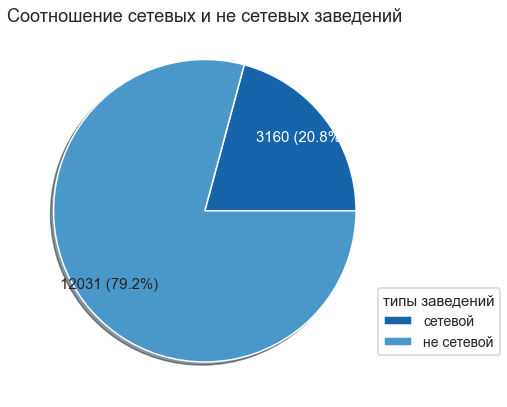

In [112]:
fg                   = plt.figure(figsize=(16,6))
gs                   = gridspec.GridSpec(ncols=1, nrows=1, figure=fg)
titles               = ['Соотношение сетевых и не сетевых заведений']
objects_amount       = list(chain_amount['количество заведений'])
types                = list(chain_amount['тип'])
ax                   = fg.add_subplot(gs[0, 0])
patches,\
texts, autotexts     = ax.pie(objects_amount, labels=None,
                              autopct=lambda p: '{:.0f} ({:.1f}%)'.format((p/100)*sum(objects_amount),p),
                              colors=sns.color_palette("Blues_r", 4),
                              textprops={'size': 14}, pctdistance=.8, 
                              shadow=True, startangle=0)
ax.legend(types, fontsize = 14,
          title="типы заведений", title_fontsize = 'small', loc='lower right', bbox_to_anchor=(1.3, .1))
ax.set_title(titles[0],size=18, loc='center', pad=1)
autotexts[0].set_color('white')

plt.setp(autotexts, size='small')
autotexts[0].set_color('white')
plt.tight_layout()

**Исследование соотношения видов объектов общественного питания по количеству**

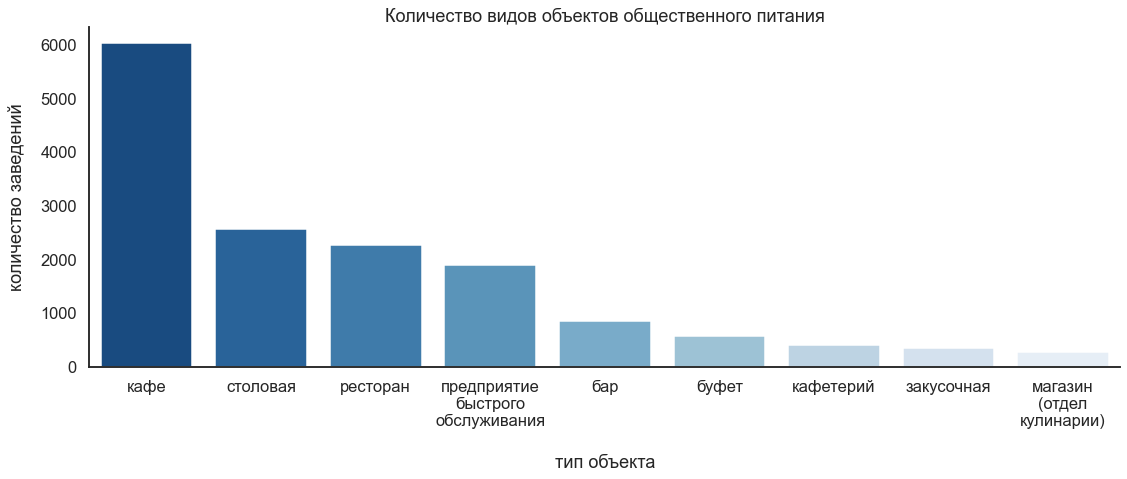

In [113]:
refresh_object_type_for_plot(rest_data)

object_type_amount = rest_data['object_type_for_plot'].value_counts().reset_index()
object_type_amount.columns = ['object_type', 'objects_amount']

sns.set(style="white", context='talk')
fg = plt.figure(figsize=(16, 7))
sns.barplot(data=object_type_amount, x='object_type', y='objects_amount', palette="Blues_r")
plt.title("Количество видов объектов общественного питания")
plt.xlabel("тип объекта", labelpad=25)
plt.ylabel("количество заведений", labelpad=15)
sns.despine(bottom=False)
plt.tight_layout()

if work_place!=3:
    fg.savefig(PATH_TO_FOLDER_DICT[work_place]+'plot\\0_bar_object_types')
    object_type_amount.to_excel(PATH_TO_FOLDER_DICT[work_place]+'csv\\0_object_amount_per_types.xlsx', index=False)

В целом все понятно, самый распространенный вид заведений - кафе. Преимущетво над ближайшим типом более чем в два раза. Типы после бара и вовсе имеют менее тысячи заведений. Взглянем на соотношение типов заведений на другом типе графика. Типы заведений с 6 места по популярности переименуем в "другой", для лучшей читаемости.

"У заведений могут быть разные типы даже при том, что это сетевое заведение. Исходим из того, что у того же Макдоналдс есть несколько типов заведений - кафе и рестораны быстрого питания" - написал я выше...но очень любопытно как отразится на этом графике замена типа заведений для Маконалдс и KFC на "предприятие быстрого обслуживания".

Уталим любопытство, предположим, что для всех заведений, объединенных одним названием, правильным является тип, указанный для большинства заведений.

In [114]:
rest_data_unified_types = rest_data.copy()
chain_names             = list(set(rest_data_unified_types[rest_data_unified_types['chain']=="да"]['object_name']))

for objects in chain_names:
    top_type   = rest_data_unified_types.query('object_name==@objects').groupby('object_type', as_index=False
                                                                               ).agg({'id':'count'}
                                                                                    ).sort_values('id', ascending=False
                                                                                                 ).iloc[0]['object_type']
    indexes    = rest_data_unified_types.query('object_name==@objects').index
    rest_data_unified_types.loc[indexes, 'object_type'] = top_type

Было 

In [115]:
print("Количество различных типов заведений\n(Макдоналдс)")
rest_data.query('object_name=="макдоналдс"').groupby('object_type_for_plot', as_index=False).agg({'id':'count'}
                                                       ).sort_values('id', ascending=False)

Количество различных типов заведений
(Макдоналдс)


,object_type_for_plot,id
1,предприятие\nбыстрого\nобслуживания,114
2,ресторан,30
0,кафе,24


Стало

In [116]:
print("Количество различных типов заведений\n(Макдоналдс)")
rest_data_unified_types.query('object_name=="макдоналдс"').groupby('object_type',
                                                                   as_index=False).agg({'id':'count'}
                                                                                      ).sort_values('id',ascending=False)

Количество различных типов заведений
(Макдоналдс)


,object_type,id
0,предприятие быстрого обслуживания,168


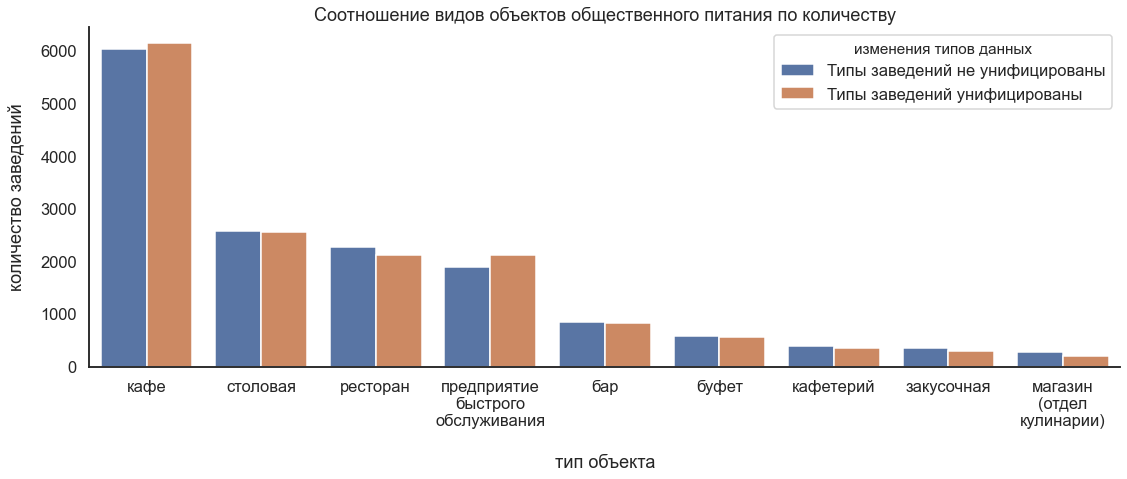

In [117]:
refresh_object_type_for_plot (rest_data_unified_types)

object_type_amount_2 = rest_data_unified_types['object_type_for_plot'].value_counts().reset_index()
object_type_amount_2.columns = ['object_type', 'objects_amount']

object_type_amount['изменения типов данных']   = 'Типы заведений не унифицированы'
object_type_amount_2['изменения типов данных'] = 'Типы заведений унифицированы'

data = pd.concat([object_type_amount, object_type_amount_2])

sns.set(style="white", context='talk')
fg = plt.figure(figsize=(16, 7))
sns.barplot(data=data, x='object_type', y='objects_amount', hue='изменения типов данных')
plt.title("Cоотношение видов объектов общественного питания по количеству")
plt.xlabel("тип объекта", labelpad=25)
plt.ylabel("количество заведений", labelpad=15)
sns.despine(bottom=False)
plt.tight_layout()
if work_place!=3:
    fg.savefig(PATH_TO_FOLDER_DICT[work_place]+'plot\\1_bar_unified')

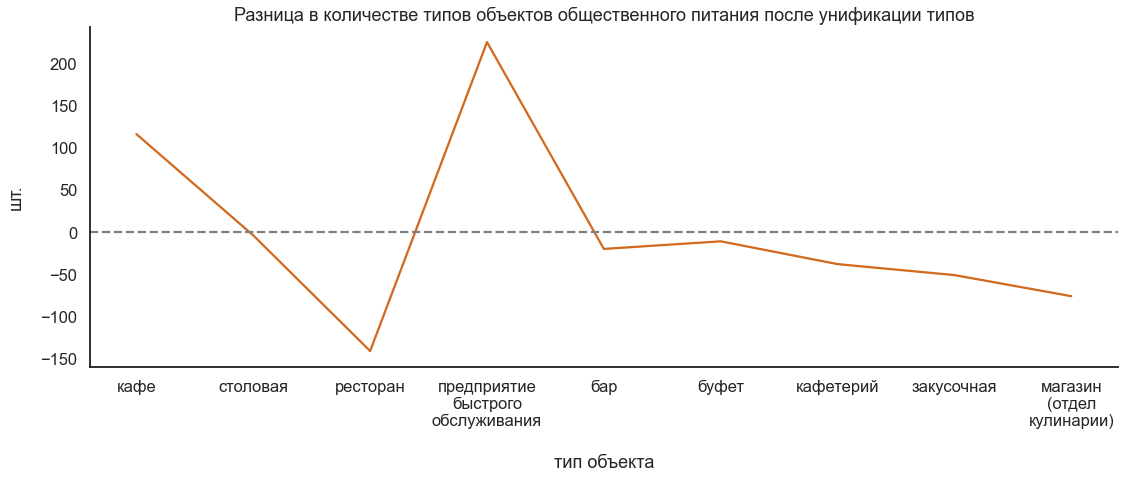

In [118]:
y_data   = data[data['изменения типов данных']=="Типы заведений унифицированы"]['objects_amount']\
         - data[data['изменения типов данных']=="Типы заведений не унифицированы"]['objects_amount']
x_data   = data[data['изменения типов данных']=="Типы заведений унифицированы"]['object_type']
dif_data = pd.DataFrame({'amount_dif':y_data, 'object_type':x_data})

sns.set(style="white", context='talk')
fg = plt.figure(figsize=(16, 7))

sns.lineplot(data=dif_data, x='object_type', y='amount_dif', sort=False, color='chocolate')
plt.axhline(y=0, color='gray',linestyle='--')
plt.title("Разница в количестве типов объектов общественного питания после унификации типов")
plt.xlabel("тип объекта", labelpad=25)
plt.ylabel("шт.", labelpad=15)
sns.despine(bottom=False)
plt.tight_layout()

if work_place!=3:
    fg.savefig(PATH_TO_FOLDER_DICT[work_place]+'plot\\2_line_units')

Какой-либо ощутимой разницы, после выбора одного "правильного" типа заведения, мы не видим. Колебания не такие и большие.

Взглянем на разницу в процентах, а не в штуках.

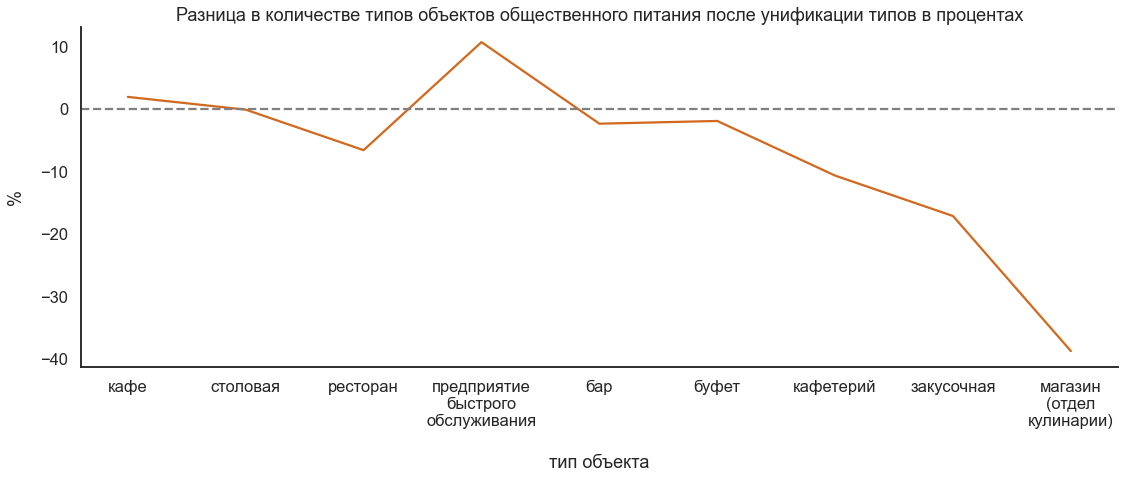

In [119]:
y_data               = dif_data['amount_dif']/data[data['изменения типов данных']=="Типы заведений унифицированы"
                                                                                                        ]['objects_amount']
dif_data_in_percents = pd.DataFrame({'amount_dif_in_percents':y_data*100, 'object_type':x_data})

sns.set(style="white", context='talk')
fg = plt.figure(figsize=(16, 7))

sns.lineplot(data=dif_data_in_percents, x='object_type', y='amount_dif_in_percents', sort=False, color='chocolate')
plt.axhline(y=0, color='grey',linestyle='--')
plt.title("Разница в количестве типов объектов общественного питания после унификации типов в процентах")
plt.xlabel("тип объекта", labelpad=25)
plt.ylabel("%", labelpad=15)
sns.despine(bottom=False)
plt.tight_layout()

if work_place!=3:
    fg.savefig(PATH_TO_FOLDER_DICT[work_place]+'plot\\3_line_percent')

Вот так более наглядно. Для типов представленных тысячами заведений, выбор одного типа для всей сети не сильно влияет на общее количество. Колебания для типа "кафе" в районе одного процента.

Унификация типов заведений практически не сказалась на столовых, барах и буфетах.

Ресторанов уменьшилось почти на 10%, а вот предприятий быстрого обслуживания наоборот увеличилось так же на 10%.

Больше всего при выборе единственного типа для одной сети пострадали кафетерии, закусочные и отделы кулинарии. Последние потеряли почти половину заведений, видимо привратившись в предприятие быстрого обслуживания.

Поскольку сильное влияние оказывается на совсем малочисленные типы заведений, я скорее убедился, что оставить разнообразие типов заведений внутри одной сети было правильным решением, учитывая нехватку информации. Для кафе и столовых разница не велика. 10% изменений у ресторанов и предприятий быстрого обслуживания конечно уже не мелочь, но поскольку у нас нет оснований считать исходные данные неверными, мы просто не делаем ошибочными 10% данных по ресторанам и предприятиям быстрого обслуживания.

Теперь сравним результат на круговой диаграмме

In [120]:
object_type_top_5                               = list(rest_data.groupby('object_type_for_plot', as_index=False
                                                                        ).agg({'id':'count'}
                                                                             ).sort_values('id',ascending=False
                                                                                          ).iloc[:5]['object_type_for_plot'])
rest_data['object_type_top_five']               = rest_data['object_type_for_plot'].copy()
rest_data['object_type_top_five']               = rest_data['object_type_top_five'].where(rest_data['object_type_top_five'
                                                                                                   ].isin(object_type_top_5
                                                                                                         ), 'другие')
rest_data_unified_types['object_type_top_five'] = rest_data_unified_types['object_type_for_plot'].copy()
rest_data_unified_types['object_type_top_five'] = rest_data_unified_types['object_type_top_five'
                                                                    ].where(rest_data_unified_types['object_type_top_five'
                                                                                                   ].isin(object_type_top_5
                                                                                                         ), 'другие')
rest_data_grouped                               = rest_data.groupby('object_type_top_five', as_index=False
                                                                   ).agg({'id':'count'})
rest_data_grouped.columns                       = ['object_type', 'objects_amount']
rest_data_unified_types_grouped                 = rest_data_unified_types.groupby('object_type_top_five', as_index=False
                                                                                 ).agg({'id':'count'})
rest_data_unified_types_grouped.columns         = ['object_type', 'objects_amount']

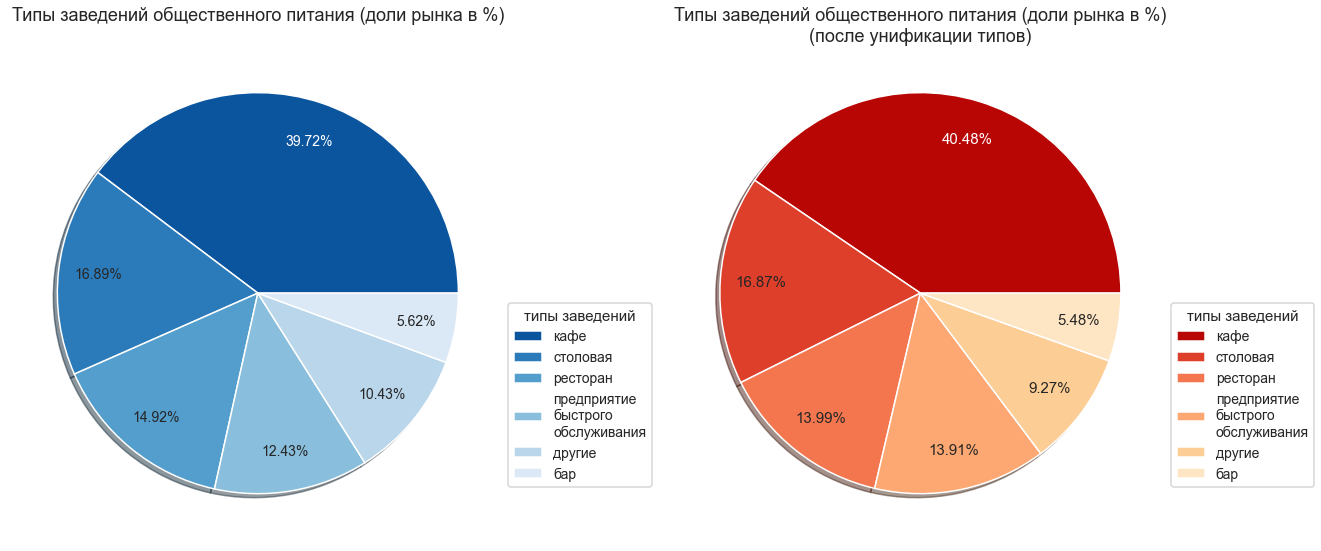

In [121]:
fg                   = plt.figure(figsize=(19,8))
gs                   = gridspec.GridSpec(ncols=2, nrows=1, figure=fg)
titles               = ['Типы заведений общественного питания (доли рынка в %)\n',
                        'Типы заведений общественного питания (доли рынка в %)\n(после унификации типов)']
types_amount         = list(rest_data_grouped.sort_values('objects_amount',ascending=False)['objects_amount'])
types_unified_amount = list(rest_data_unified_types_grouped.sort_values('objects_amount',ascending=False)['objects_amount'])
types                = list(rest_data_grouped.sort_values('objects_amount',ascending=False)['object_type'])
types_unified        = list(rest_data_unified_types_grouped.sort_values('objects_amount',ascending=False)['object_type'])
ax                   = fg.add_subplot(gs[0, 0])
patches,\
texts, autotexts     = ax.pie(types_amount, labels=None,
                              autopct='%1.2f%%', textprops={'size': 14},
                              colors=sns.color_palette("Blues_r", 6),
                              pctdistance=.8,
                              shadow=True, startangle=0)
ax.legend(types, fontsize = 14,
          title="типы заведений", title_fontsize = 'small', loc='lower right', bbox_to_anchor=(1.3, .1))
ax.set_title(titles[0],size=18, loc='center', pad=1)
autotexts[0].set_color('white')

ax                             = fg.add_subplot(gs[0, 1])
patches,\
texts, autotexts    = ax.pie(types_unified_amount, labels=None,
                             autopct='%1.2f%%', textprops={'size': 12},
                             colors=sns.color_palette("OrRd_r", 6),
                             pctdistance=.8,
                             shadow=True, startangle=0)
ax.legend(types_unified, fontsize = 14,
          title="типы заведений", title_fontsize = 'small', loc='lower right', bbox_to_anchor=(1.3, .1))
ax.set_title(titles[1],size=18, loc='center', pad=1)
plt.setp(autotexts, size='small')
autotexts[0].set_color('white')
plt.tight_layout()

if work_place!=3:
    fg.savefig(PATH_TO_FOLDER_DICT[work_place]+'plot\\4_pie_unified')

Даже для ресторанов и предприятий быстрого питания, для которых количество заведений увеличилось/уменьшилось до 10%, их доля на рынке изменилась не существенно.

В любом случае порядка 40% заведений являются кафе, до 17% - столовыми, на третьем месте рестораны с долей около 15%. Даже если мы выбрали единственный тип заведения, это корректирует доли ресторанов и предприятий быстрого питания лишь на 1 процентный пункт.

Я думаю, что мы обедилсь, что можно не приводить типы заведений к единственному.

**Исследование соотношения сетевых и несетевых заведений по количеству**

In [122]:
chain_object_type_amount               = rest_data[rest_data['chain']=='да']['object_type_for_plot'
                                                                            ].value_counts().reset_index()
no_chain_object_type_amount            = rest_data[rest_data['chain']=='нет']['object_type_for_plot'
                                                                             ].value_counts().reset_index()
chain_object_type_amount.columns       = ['object_type', 'objects_amount']
no_chain_object_type_amount.columns    = ['object_type', 'objects_amount']

chain_object_amount                    = chain_object_type_amount['objects_amount'].sum()
no_chain_object_amount                 = no_chain_object_type_amount['objects_amount'].sum()

chain_object_type_amount['percent']    = round((chain_object_type_amount['objects_amount']/chain_object_amount)*100,2)
no_chain_object_type_amount['percent'] = round((no_chain_object_type_amount['objects_amount']/no_chain_object_amount)*100,2)

chain_object_type_amount['chain']      = 'сетевой'
no_chain_object_type_amount['chain']   = 'не сетевой'

data = pd.concat([chain_object_type_amount, no_chain_object_type_amount])

print("Количество сетевых заведений   : {}".format(chain_object_amount))
print("Количество не сетевых заведений: {}".format(no_chain_object_amount))

Количество сетевых заведений   : 3160
Количество не сетевых заведений: 12031


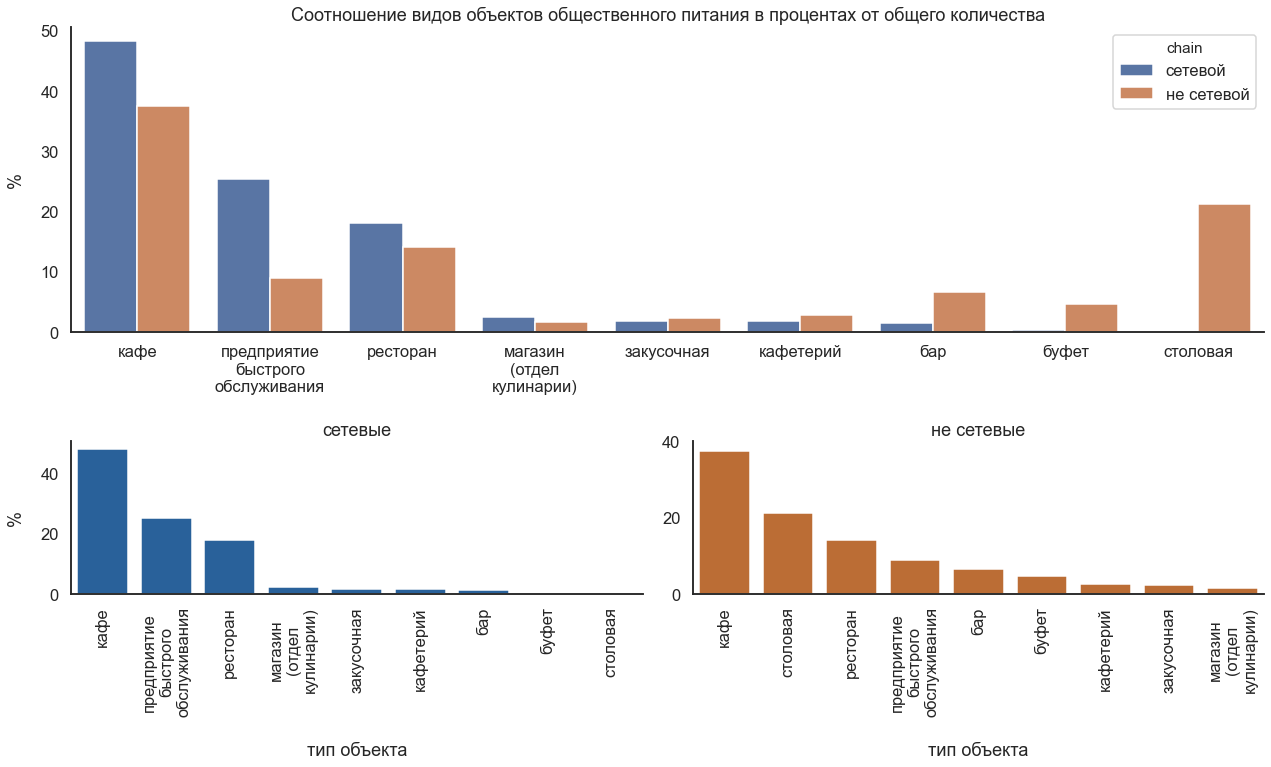

In [123]:
sns.set(style='white', context='talk')
fg = plt.figure(figsize=(18, 11))
gs = gridspec.GridSpec(ncols=2, nrows=2, figure=fg, height_ratios=[2,1])

fig_ax = fg.add_subplot(gs[0, 0:2])
sns.barplot(data=data, x='object_type', y='percent', hue='chain')
plt.title("Cоотношение видов объектов общественного питания в процентах от общего количества")
plt.xlabel("")
plt.ylabel("%", labelpad=15)

fig_ax = fg.add_subplot(gs[1, 0])
sns.barplot(data=chain_object_type_amount, x='object_type', y='percent', color='#1661ad')
plt.title("сетевые")
plt.xlabel("тип объекта", labelpad=25)
plt.ylabel("%", labelpad=15)
plt.xticks(rotation=90)

fig_ax = fg.add_subplot(gs[1, 1])
sns.barplot(data=no_chain_object_type_amount, x='object_type', y='percent', color='chocolate')
plt.title("не сетевые", loc='center')
plt.xlabel("тип объекта", labelpad=25)
plt.ylabel("")
plt.xticks(rotation=90)
plt.yticks([0,20,40])
sns.despine(bottom=False)
plt.tight_layout(h_pad=1.5)

if work_place!=3:
    fg.savefig(PATH_TO_FOLDER_DICT[work_place]+'plot\\5_bar_chain_vs_not_chain')

Единственное, что связывает сетевые и не сетевые заведения это "кафе" - самый распространенный тип. И то, разница в занимаемой доле составляет 10 процентных пунктов. Среди сетевых заведений кафе составляют половину. Еще половина практически полностию разделена между предприятием быстрого обслуживания и рестораном. Остальные типы практически не встречаются.

Для не сетевых заведений распределение количества заведений более плавное. Первое место все еще сильно превышает последующие, но нет падения начиная с третьего места. Помимо различия в очередности типов, это главное различие между сетевыми и не сетевыми заведениями. Первые три места в распределениях похожи. Первое место около половины, второе в районе 20% и третье - около 15-17%.

In [124]:
rest_data_pivot          = rest_data.pivot_table(values='id',
                                                 index='object_type_top_five',
                                                 columns='chain',
                                                 aggfunc='count').reset_index()
rest_data_pivot.columns  = ['object_name', 'chain', 'not_chain']
rest_data_pivot['total'] = rest_data_pivot['chain'] + rest_data_pivot['not_chain']
rest_data_pivot          = rest_data_pivot.sort_values('total')

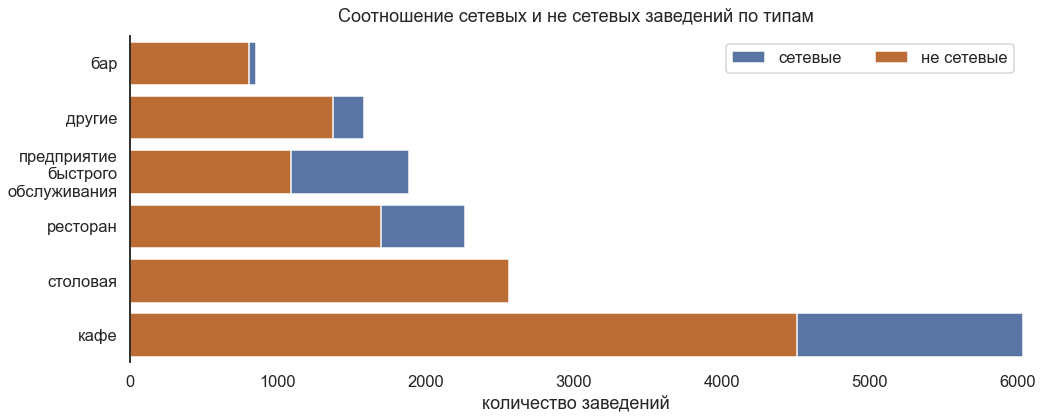

In [125]:
fg, ax                   = plt.subplots(figsize=(16, 6))
sns.barplot(x="total", y = "object_name", data=rest_data_pivot, label="сетевые", color="b")
sns.barplot(x="not_chain", y = "object_name", data=rest_data_pivot, label="не сетевые", color='chocolate')
plt.title("Соотношение сетевых и не сетевых заведений по типам", pad=15)
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(ylabel="",
       xlim=(0, rest_data_pivot['total'].max()),
       xlabel="количество заведений")
sns.despine(bottom=True)

if work_place!=3:
    fg.savefig(PATH_TO_FOLDER_DICT[work_place]+'plot\\6_bar_chain_and_not_chain')

In [126]:
chain_rest                       = rest_data[rest_data['chain'] == 'да'].copy()
chain_amount                     = rest_data['chain'].value_counts().iloc[1]
no_chain_rest                    = rest_data[rest_data['chain'] == 'нет'].copy()
no_chain_amount                  = rest_data['chain'].value_counts().iloc[0]

chain_rest_grouped               = chain_rest.groupby('object_type_top_five', as_index=False).agg({'id':'count'})
chain_rest_grouped.columns       = ['object_type', 'objects_amount']
chain_rest_grouped['chain']      = 'сетевой'
chain_rest_grouped['percent']    = round((chain_rest_grouped['objects_amount']/chain_amount)*100,2)

no_chain_rest_grouped            = no_chain_rest.groupby('object_type_top_five', as_index=False).agg({'id':'count'})
no_chain_rest_grouped.columns    = ['object_type', 'objects_amount']
no_chain_rest_grouped['chain']   = 'не сетевой'
no_chain_rest_grouped['percent'] = round((no_chain_rest_grouped['objects_amount']/no_chain_amount)*100,2)

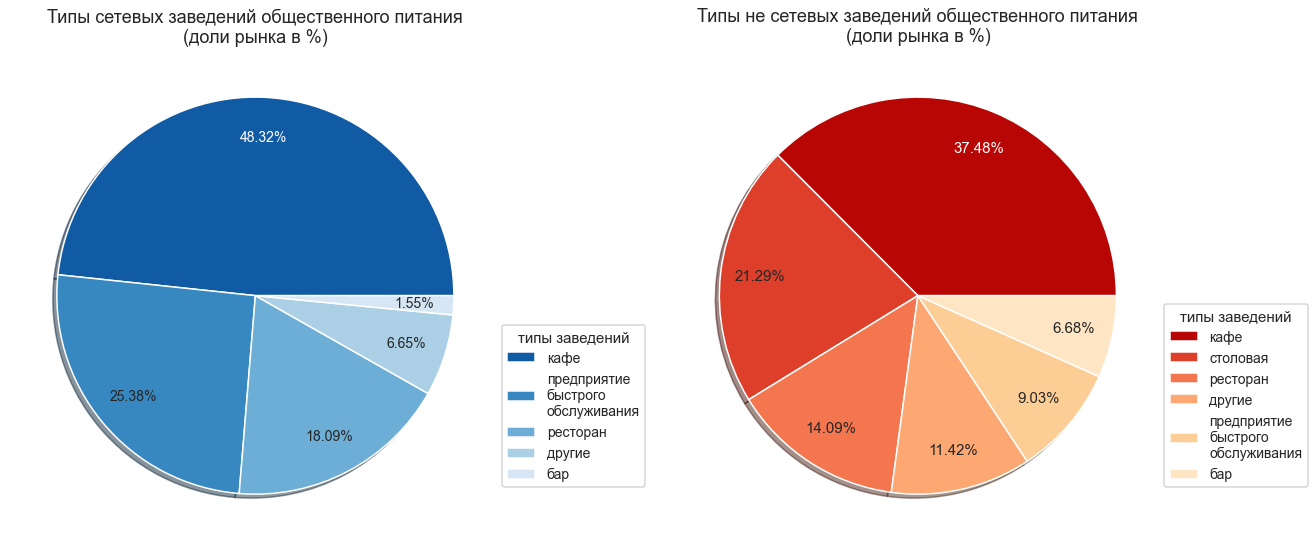

In [127]:
fg                               = plt.figure(figsize=(19,8))
gs                               = gridspec.GridSpec(ncols=2, nrows=1, figure=fg)
titles                           = ['Типы сетевых заведений общественного питания\n(доли рынка в %)',
                                    'Типы не сетевых заведений общественного питания\n(доли рынка в %)']
amount                           = list(chain_rest_grouped.sort_values('objects_amount',ascending=False)['objects_amount'])
types                            = list(chain_rest_grouped.sort_values('objects_amount',ascending=False)['object_type'])

ax                               = fg.add_subplot(gs[0, 0])
patches, texts, autotexts        = ax.pie(amount[:-1], labels=None,
                                          autopct='%1.2f%%', textprops={'size': 14},
                                          colors=sns.color_palette("Blues_r", 5),
                                          pctdistance=.8,
                                          shadow=True, startangle=0)
ax.legend(types[:-1], fontsize = 14,
          title="типы заведений", title_fontsize = 'small', loc='lower right', bbox_to_anchor=(1.3, .1))
ax.set_title(titles[0], size=18, loc='center', pad=5)
autotexts[0].set_color('white')
amount                           = list(no_chain_rest_grouped.sort_values('objects_amount', ascending=False
                                                                         )['objects_amount'])
types                            = list(no_chain_rest_grouped.sort_values('objects_amount', ascending=False
                                                                         )['object_type'])

ax                               = fg.add_subplot(gs[0, 1])
patches, texts, autotexts        = ax.pie(amount, labels=None,
                                          autopct='%1.2f%%', textprops={'size': 12},
                                          colors=sns.color_palette("OrRd_r", 6),
                                          pctdistance=.8,
                                          shadow=True, startangle=0)
ax.legend(types, fontsize = 14,
          title="типы заведений", title_fontsize = 'small', loc='lower right', bbox_to_anchor=(1.3, .1))
ax.set_title(titles[1], size=18, loc='center')
plt.setp(autotexts, size='small')
autotexts[0].set_color('white')
plt.tight_layout()

if work_place!=3:
    fg.savefig(PATH_TO_FOLDER_DICT[work_place]+'plot\\7_pie_chain_vs_not_chain')

По первым графикам я бы сказал, что более плавное распределение количества типов для не сетевых заведений делает привлекательными такие типы как **столовая** - 20% заведений приводит к достаточной конкуренции, но полное отсутствие конкуренции со стороны сетевых столовых. В отличии от кафе, которые заманчиво занимают 40% рынка, но помимо возросшей в два раза конкуренции между не сетевыми кафе, добавятся еще 50% рынка сетевых кафе. И пусть сетевых заведений - четверть от общей массы, дополнительная конкуренция нам ни к чему. По той же причине интересен **бар** с около 11% рынка.

**Виды объектов общественного питания, для которых характерно сетевое распространение**

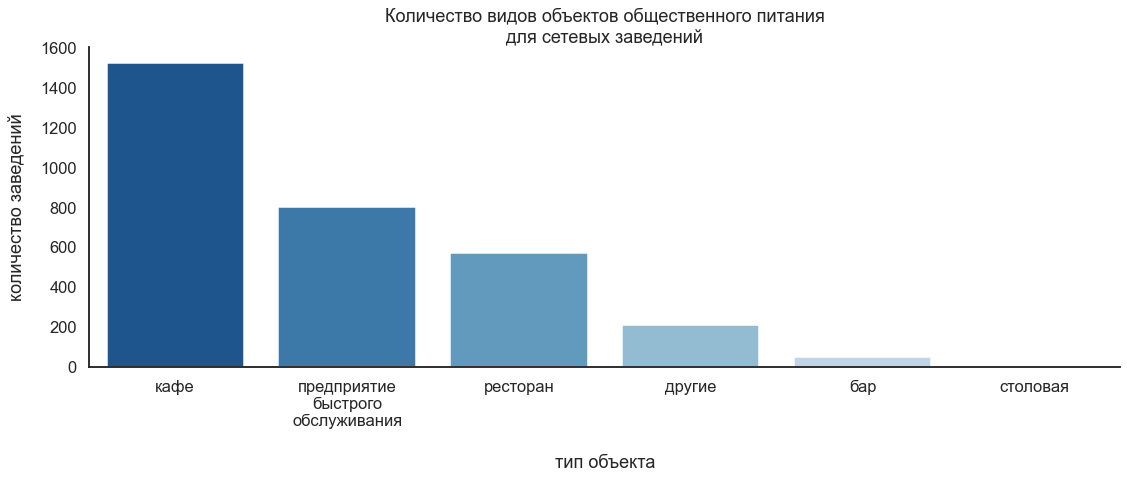

In [128]:
chain_rest_grouped = chain_rest_grouped.sort_values('objects_amount', ascending=False)

sns.set(style="white", context='talk')
fg = plt.figure(figsize=(16, 7))
sns.barplot(data=chain_rest_grouped, x='object_type', y='objects_amount', palette="Blues_r")
plt.title("Количество видов объектов общественного питания\nдля сетевых заведений")
plt.xlabel("тип объекта", labelpad=25)
plt.ylabel("количество заведений", labelpad=15)
sns.despine(bottom=False)
plt.tight_layout()
if work_place!=3:
    fg.savefig(PATH_TO_FOLDER_DICT[work_place]+'plot\\8_bar_chain_top_5')

In [129]:
top_three                                   = list(chain_rest_grouped.iloc[:3]['object_type'])
other                                       = list(chain_rest_grouped.iloc[3:]['object_type'])
chain_rest_grouped['object_type_top_three'] = chain_rest_grouped['object_type'].copy()
chain_rest_grouped['object_type_top_three'] = chain_rest_grouped['object_type_top_three'
                                                                ].where(chain_rest_grouped['object_type_top_three'
                                                                                          ].isin(top_three
                                                                                                ), 'другие')
chain_rest_grouped['object_type_two_types'] = chain_rest_grouped['object_type_top_three'].copy()
chain_rest_grouped['object_type_two_types'] = chain_rest_grouped['object_type_two_types'
                                                                ].where(chain_rest_grouped['object_type_two_types'
                                                                                          ].isin(other), 'top_3')

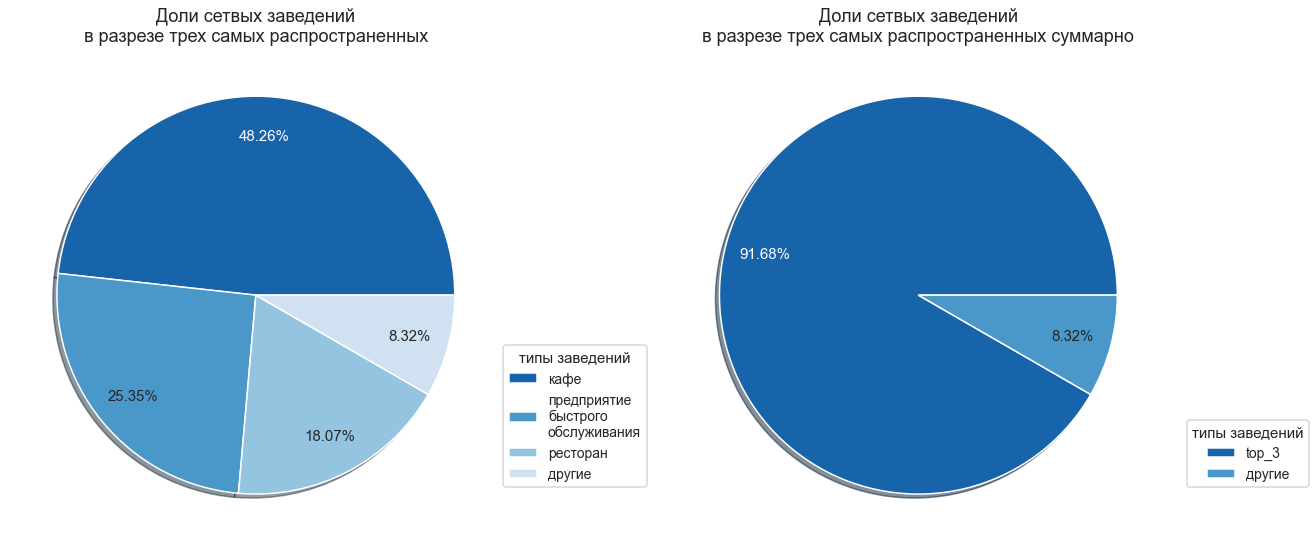

In [130]:
fg                               = plt.figure(figsize=(19,8))
gs                               = gridspec.GridSpec(ncols=2, nrows=1, figure=fg)
amount                           = list(chain_rest_grouped.groupby('object_type_top_three', as_index=False
                                                                  ).agg({'objects_amount':'sum'}
                                                                       ).sort_values('objects_amount',ascending=False
                                                                                    )['objects_amount'])
types                            = list(chain_rest_grouped.groupby('object_type_top_three', as_index=False
                                                                  ).agg({'objects_amount':'sum'}
                                                                       ).sort_values('objects_amount',ascending=False
                                                                                    )['object_type_top_three'])
ax                               = fg.add_subplot(gs[0, 0])
patches, texts, autotexts        = ax.pie(amount, labels=None,
                                          autopct='%1.2f%%', textprops={'size': 14},
                                          colors=sns.color_palette("Blues_r", 4),
                                          pctdistance=.8,
                                          shadow=True, startangle=0)
ax.legend(types, fontsize = 14,
          title="типы заведений", title_fontsize = 'small', loc='lower right', bbox_to_anchor=(1.3, .1))
ax.set_title("Доли сетвых заведений\nв разрезе трех самых распространенных", size=18, loc='center', pad=5)
autotexts[0].set_color('white')
plt.setp(autotexts, size='small')

amount                           = list(chain_rest_grouped.groupby('object_type_two_types', as_index=False
                                                                  ).agg({'objects_amount':'sum'}
                                                                       ).sort_values('objects_amount',ascending=False
                                                                                    )['objects_amount'])
types                            = list(chain_rest_grouped.groupby('object_type_two_types', as_index=False
                                                                  ).agg({'objects_amount':'sum'}
                                                                       ).sort_values('objects_amount',ascending=False
                                                                                    )['object_type_two_types'])
ax                               = fg.add_subplot(gs[0, 1])
patches, texts, autotexts        = ax.pie(amount, labels=None,
                                          autopct='%1.2f%%', textprops={'size': 14},
                                          colors=sns.color_palette("Blues_r", 4),
                                          pctdistance=.8,
                                          shadow=True, startangle=0)
ax.legend(types, fontsize = 14,
          title="типы заведений", title_fontsize = 'small', loc='lower right', bbox_to_anchor=(1.3, .1))
ax.set_title("Доли сетвых заведений\nв разрезе трех самых распространенных суммарно", size=18, loc='center', pad=5)
autotexts[0].set_color('white')
plt.setp(autotexts, size='small')
sns.despine(bottom=False)
plt.tight_layout()
if work_place!=3:
    fg.savefig(PATH_TO_FOLDER_DICT[work_place]+'plot\\9_pie_chain_top_3')

In [131]:
rest_data_grouped        = rest_data.groupby(['object_type', 'chain'],as_index=False).agg({'id':'count'})
rest_data_chain          = rest_data_grouped.query('chain=="да"')
rest_data_no_chain       = rest_data_grouped.query('chain=="нет"')

rest_data_merged         = rest_data_chain.merge(rest_data_no_chain, on='object_type')
rest_data_merged.columns = ['тип заведения', 'сетевой','количество сетевых','не сетевой','количество не сетевых']
rest_data_merged         = rest_data_merged[['тип заведения','количество сетевых','количество не сетевых']]
rest_data_merged['общее количество'] = rest_data_merged['количество сетевых']+rest_data_merged['количество не сетевых']
rest_data_merged['процент сетевых']  = round((rest_data_merged['количество сетевых']/rest_data_merged['общее количество'])*
                                             100,2)
rest_data_merged                     = rest_data_merged.sort_values('процент сетевых', ascending=False)
rest_data_merged

,тип заведения,количество сетевых,количество не сетевых,общее количество,процент сетевых
6,предприятие быстрого обслуживания,801,1087,1888,42.43
5,магазин (отдел кулинарии),80,192,272,29.41
3,кафе,1525,4509,6034,25.27
7,ресторан,571,1695,2266,25.20
2,закусочная,59,289,348,16.95
4,кафетерий,58,335,393,14.76
0,бар,49,804,853,5.74
1,буфет,13,558,571,2.28
8,столовая,4,2562,2566,0.16


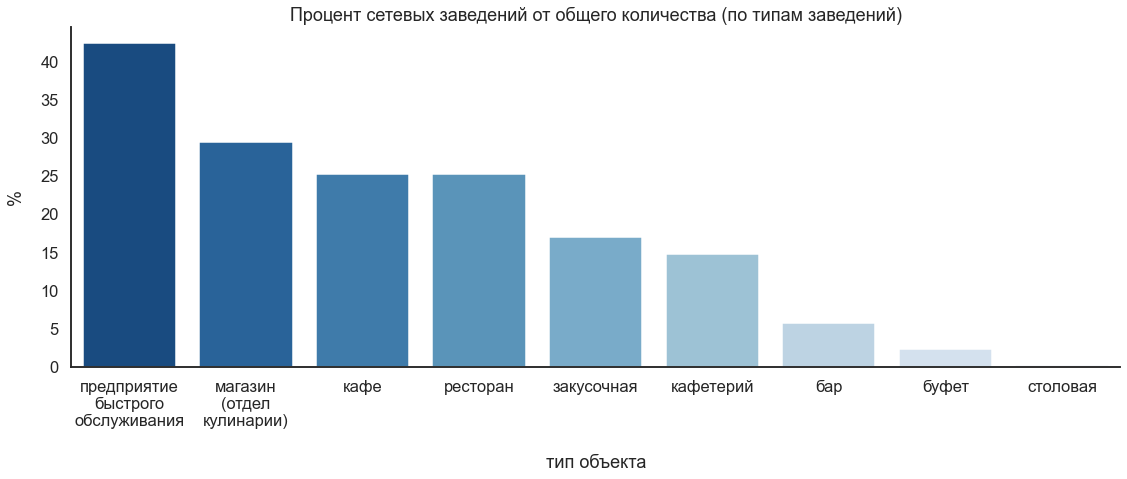

In [132]:
x_values = list(rest_data_merged['тип заведения'].apply(lambda x: x.replace(' ','\n')))
y_values = list(rest_data_merged['процент сетевых'])

sns.set(style="white", context='talk')
fg = plt.figure(figsize=(16, 7))
sns.barplot(x=x_values, y=y_values, palette="Blues_r")
plt.title("Процент сетевых заведений от общего количества (по типам заведений)")
plt.xlabel("тип объекта", labelpad=25)
plt.ylabel("%", labelpad=15)
sns.despine(bottom=False)
plt.tight_layout()
if work_place!=3:
    fg.savefig(PATH_TO_FOLDER_DICT[work_place]+'plot\\91_bar_percent_of_chain')

Сетевое распределение характерно в первую очередь для предприятий быстрого обслуживания. 42% заведений этого типа сетевые. На втором месте отделы кулинарии и следом с одинаковым результатом около 25% кафе и рестораны. Общее соотношение сетевых и не сетевых заведений 20/80, получается, что первые четыре типа имеют процент сетевых заведений выше среднего, причем предприятия быстрого питания почти в два раза.

**Выявление характерного количества заведений в сети и посадочных мест в них**

In [133]:
chain_rest_regularity         = chain_rest.groupby('object_name', as_index=False).agg({'id':'count',
                                                                                       'number':'mean',
                                                                                       'object_type_top_five':'first'})
chain_rest_regularity.columns = ['название заведения','количество объектов','количество посадочных мест','тип заведения']
median_amount                 = chain_rest_regularity['количество объектов'].median()
median_number                 = chain_rest['number'].median()
mean_amount                   = chain_rest_regularity['количество объектов'].mean()
mean_number                   = chain_rest['number'].mean()
chain_rest_cut                = chain_rest[chain_rest["number"]<=300]
chain_rest_regularity_cut     = chain_rest_regularity[chain_rest_regularity['количество объектов']<=50]
chain_rest_regularity['количество посадочных мест'] = chain_rest_regularity['количество посадочных мест'
                                                                           ].apply(lambda x: int(x))

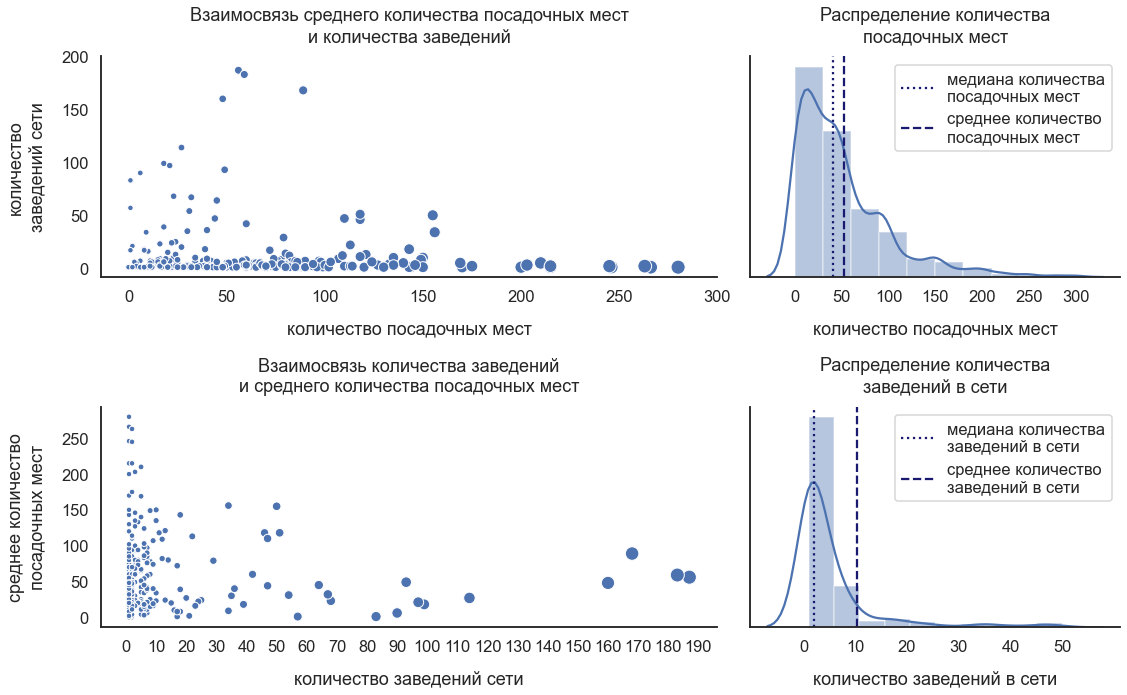

In [134]:
sns.set(style="white",  context='talk')
fg   = plt.figure(figsize=(16,10))
gs   = gridspec.GridSpec(ncols=2, nrows=2, figure=fg, width_ratios=(5,3))

ax_1 = fg.add_subplot(gs[0, 0])
sns.scatterplot(data=chain_rest_regularity,
                x='количество посадочных мест',y='количество объектов', size='количество посадочных мест',
                palette="Blues_r", legend=False, sizes=(30, 200), linewidth=1)
plt.title('Взаимосвязь среднего количества посадочных мест\nи количества заведений',pad=15)
plt.xlabel('количество посадочных мест', labelpad=15)
plt.ylabel('количество\nзаведений сети', labelpad=15)
plt.xticks(np.arange(0,350,50))
plt.yticks(np.arange(0,250,50))

ax_2 = fg.add_subplot(gs[0, 1])
plt.title('Распределение количества\nпосадочных мест',pad=15)
plt.yticks([])
sns.distplot(chain_rest_cut["number"], bins=10)
plt.xlabel("количество посадочных мест", labelpad=15)
plt.axvline(median_number, color='midnightblue', ls=':', label='медиана количества\nпосадочных мест')
plt.axvline(mean_number, color='midnightblue', ls='--', label='среднее количество\nпосадочных мест')
plt.xticks(np.arange(0,350,50))
plt.legend(loc='upper right')

ax_3 = fg.add_subplot(gs[1, 0])
sns.scatterplot(data=chain_rest_regularity,
                x='количество объектов',y='количество посадочных мест', size='количество объектов',
                palette="Blues_r", legend=False, sizes=(30, 200), linewidth=1)
plt.title('Взаимосвязь количества заведений\nи среднего количества посадочных мест',pad=15)
plt.xlabel('количество заведений сети', labelpad=15)
plt.ylabel('среднее количество\nпосадочных мест', labelpad=15)
plt.xticks(np.arange(0,200,10))
plt.yticks(np.arange(0,300,50))

ax_4 = fg.add_subplot(gs[1, 1])
plt.title('Распределение количества\nзаведений в сети',pad=15)
sns.distplot(chain_rest_regularity_cut["количество объектов"], bins=10)
plt.xlabel("количество заведений в сети", labelpad=15)
plt.axvline(median_amount, color='midnightblue', ls=':', label='медиана количества\nзаведений в сети')
plt.axvline(mean_amount, color='midnightblue', ls='--', label='среднее количество\nзаведений в сети')
plt.xticks(np.arange(0,60,10))
plt.yticks([])
plt.legend(loc='upper right')

sns.despine(bottom=False)
plt.tight_layout()
if work_place!=3:
    fg.savefig(PATH_TO_FOLDER_DICT[work_place]+'plot\\11_scatter_dist_plot')

Взглянем на диаграмму рассеяния для топ 3 заведений отдельно.

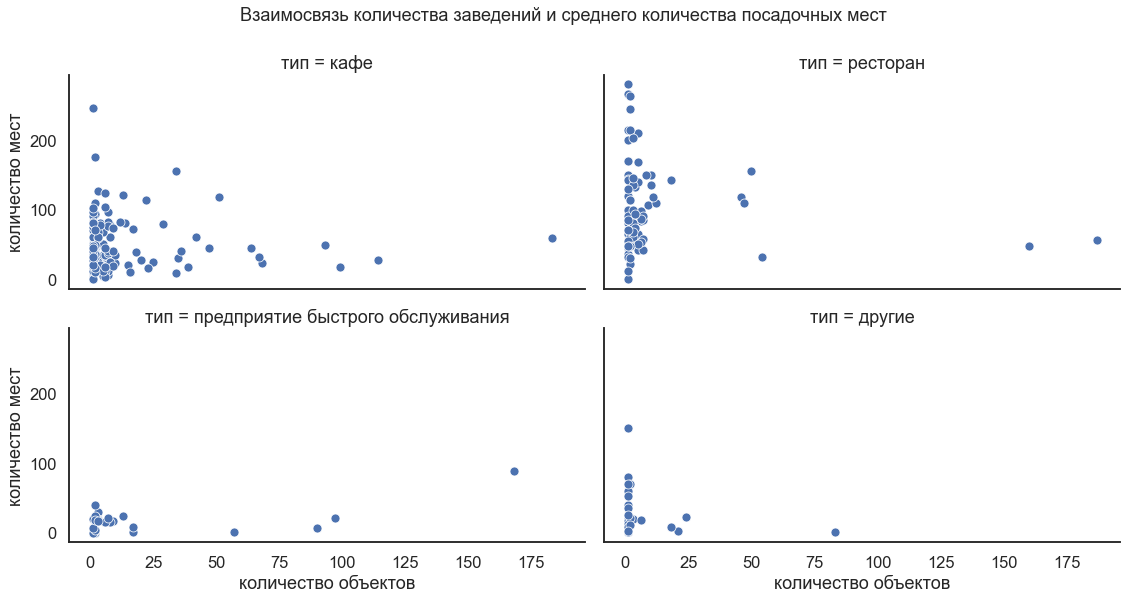

In [135]:
chain_rest_regularity['тип'] = chain_rest_regularity['тип заведения'].copy()
chain_rest_regularity['тип'].replace('бар', 'другие', inplace=True)
chain_rest_regularity['тип'].replace('предприятие\nбыстрого\nобслуживания',
                                     'предприятие быстрого обслуживания', inplace=True)

g = sns.FacetGrid(chain_rest_regularity, col="тип", col_wrap=2, height=4, aspect=2)
g.map(sns.scatterplot, "количество объектов", "количество посадочных мест")
g.fig.suptitle("Взаимосвязь количества заведений и среднего количества посадочных мест",
               y=1.05, fontsize=18, ha='center')
g.set_axis_labels('количество объектов','количество мест')
plt.show()
if work_place!=3:
    g.savefig(PATH_TO_FOLDER_DICT[work_place]+'plot\\12_JointGrid_per_types')

Взглянув на диаграму по каждому типу, мы теперь знаем, что "уплотнение" в диапазоне до 150 посадочных мест по оси Y и до 50 заведений по оси X на общей диаграме это **кафе**, а "свечка" от 150 и выше посадочных мест, но с парой заведений - **рестораны**. Сети предприятий быстрого обслуживания практически не имеют сетей более 20 заведений, а вместительность более 50 человек.

Альтернаьтивный взгляд, более компактный.

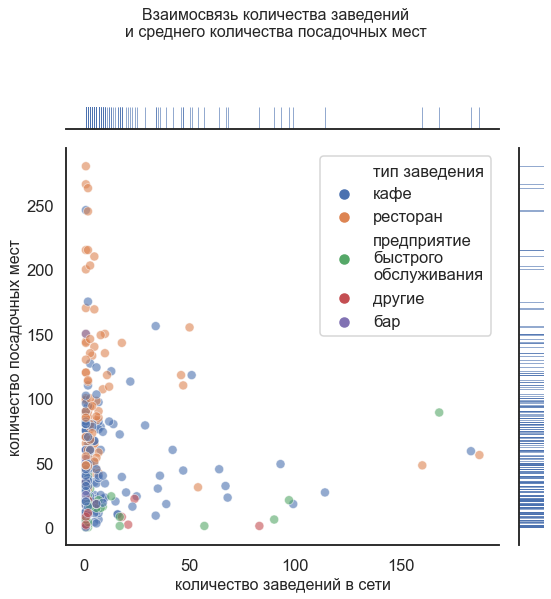

In [136]:
g = sns.JointGrid(data=chain_rest_regularity, x="количество объектов", y="количество посадочных мест",
                  height=8, space=0, ratio=10)
g.plot_joint(sns.scatterplot, 
             hue=chain_rest_regularity["тип заведения"], alpha=.6, legend='brief')
g.fig.suptitle("Взаимосвязь количества заведений\nи среднего количества посадочных мест",
               y=1.05, fontsize=16, ha='center')
g.set_axis_labels('количество заведений в сети','количество посадочных мест', fontsize=16)
g.plot_marginals(sns.rugplot, height=1, alpha=.6)
plt.tight_layout()
if work_place!=3:
    g.savefig(PATH_TO_FOLDER_DICT[work_place]+'plot\\13_JointGrid')

In [137]:
chain_rest_regularity[chain_rest_regularity['количество объектов']>150].sort_values("количество объектов",
                                                                                      ascending=False)

,название заведения,количество объектов,количество посадочных мест,тип заведения,тип
22,kfc,187,56,ресторан,ресторан
299,шоколадница,183,59,кафе,кафе
164,макдоналдс,168,89,предприятие\nбыстрого\nобслуживания,предприятие быстрого обслуживания
77,бургер кинг,160,48,ресторан,ресторан


In [138]:
chain_rest_regularity[chain_rest_regularity['количество посадочных мест']>150].sort_values("количество посадочных мест",
                                                                                      ascending=False).head()

,название заведения,количество объектов,количество посадочных мест,тип заведения,тип
249,старина миллер,1,280,ресторан,ресторан
221,пражечка,1,266,ресторан,ресторан
291,чешская пивная козловица,2,263,ресторан,ресторан
118,елки палки,1,246,кафе,кафе
201,пилзнер,2,245,ресторан,ресторан


Половина сетевых являются очень скромными сетями из двух заведений. Чаще всего сеть включает до 5 заведений, примерно четверть от их количества - сети, включающие до 10 заведений.

Четыре сети имеют более 150 заведенийю Среди них два ресторана, кафе и предприятие быстрого обслуживания. По сути это одно кафе и три крупнейших сетевых фаст фуда.

По количеству посадочных мест данные имеют больший разброс. Так, значения до 100 посадочных мест не являются редкостью, Половина заведений имеет до 50 посадочных мест. Четыре из пяти заведений с максимальным количестовм мест - пивные.

**Описание среднего количества посадочных мест для каждого вида объекта общественного питания**

In [139]:
mean_number = rest_data.copy()
mean_number = mean_number.groupby(["object_type_for_plot","chain"], as_index=False).agg({'number':['mean', 'median']})
mean_number.columns = ['тип заведения', 'сеть', 'число мест (среднее)','число мест (медиана)']

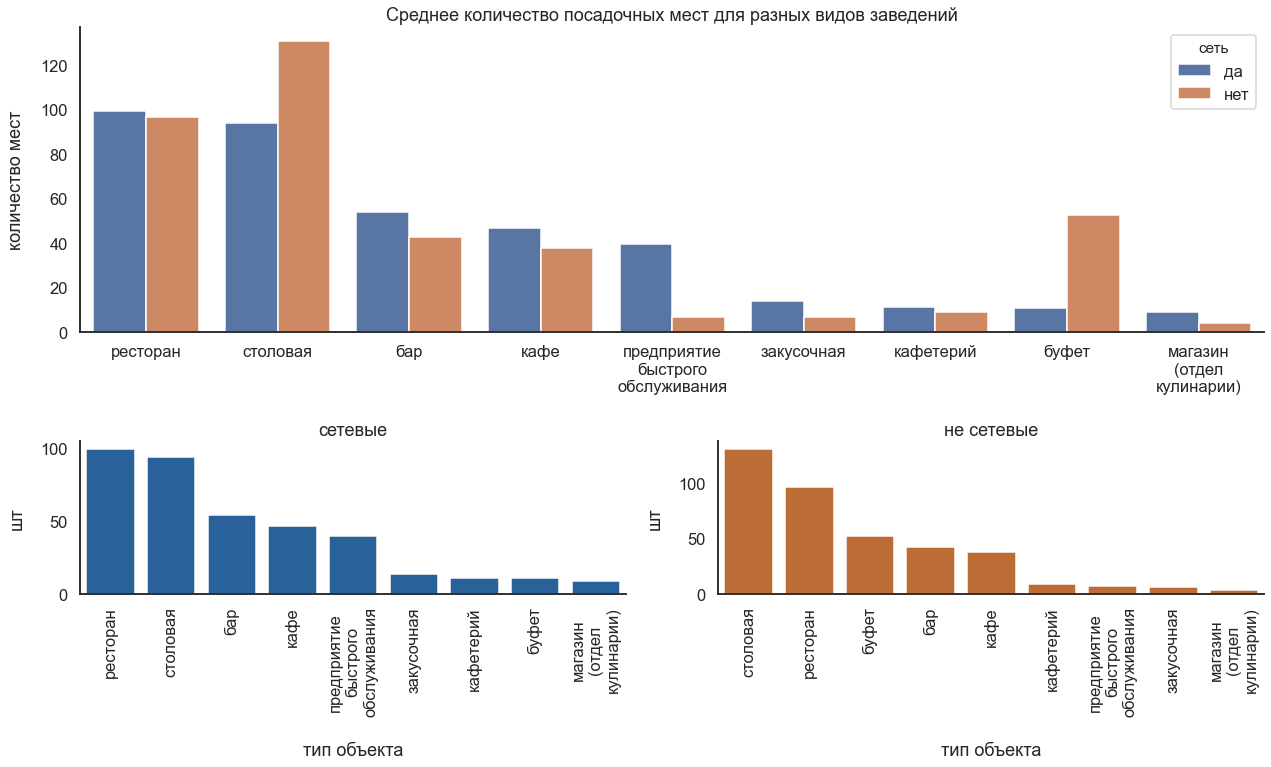

In [140]:
order = list(mean_number[mean_number['сеть']=='да'].sort_values('число мест (среднее)',ascending=False)['тип заведения'])

sns.set(style='white', context='talk')
fg = plt.figure(figsize=(18, 11))
gs = gridspec.GridSpec(ncols=2, nrows=2, figure=fg, height_ratios=[2,1])

fig_ax = fg.add_subplot(gs[0, 0:2])
sns.barplot(data=mean_number, x='тип заведения', y='число мест (среднее)', hue='сеть', order=order)
plt.title("Среднее количество посадочных мест для разных видов заведений")
plt.xlabel("")
plt.ylabel("количество мест", labelpad=15)

fig_ax = fg.add_subplot(gs[1, 0])
sns.barplot(data=mean_number[mean_number['сеть']=='да'], x='тип заведения', y='число мест (среднее)',
            order=order, color='#1661ad')
plt.title("сетевые")
plt.xlabel("тип объекта", labelpad=25)
plt.ylabel("шт", labelpad=15)
plt.xticks(rotation=90)


fig_ax = fg.add_subplot(gs[1, 1])
sns.barplot(data=mean_number[mean_number['сеть']=='нет'].sort_values('число мест (среднее)',ascending=False),
            x='тип заведения', y='число мест (среднее)', color='chocolate')
plt.title("не сетевые")
plt.xlabel("тип объекта", labelpad=25)
plt.ylabel("шт", labelpad=15)
plt.xticks(rotation=90)

sns.despine(bottom=False)
plt.tight_layout(h_pad=1.5)

if work_place!=3:
    fg.savefig(PATH_TO_FOLDER_DICT[work_place]+'plot\\14_bar_chain_vs_not_chain_mean')

Поскольку разброс по количеству посадочных мест достаточно велик, возможно правильнее использовать медианное значение. Четыре самых вместительных ресторана, например, очень сильно влияют на среднее количество посадочных мест для своего типа заведений.

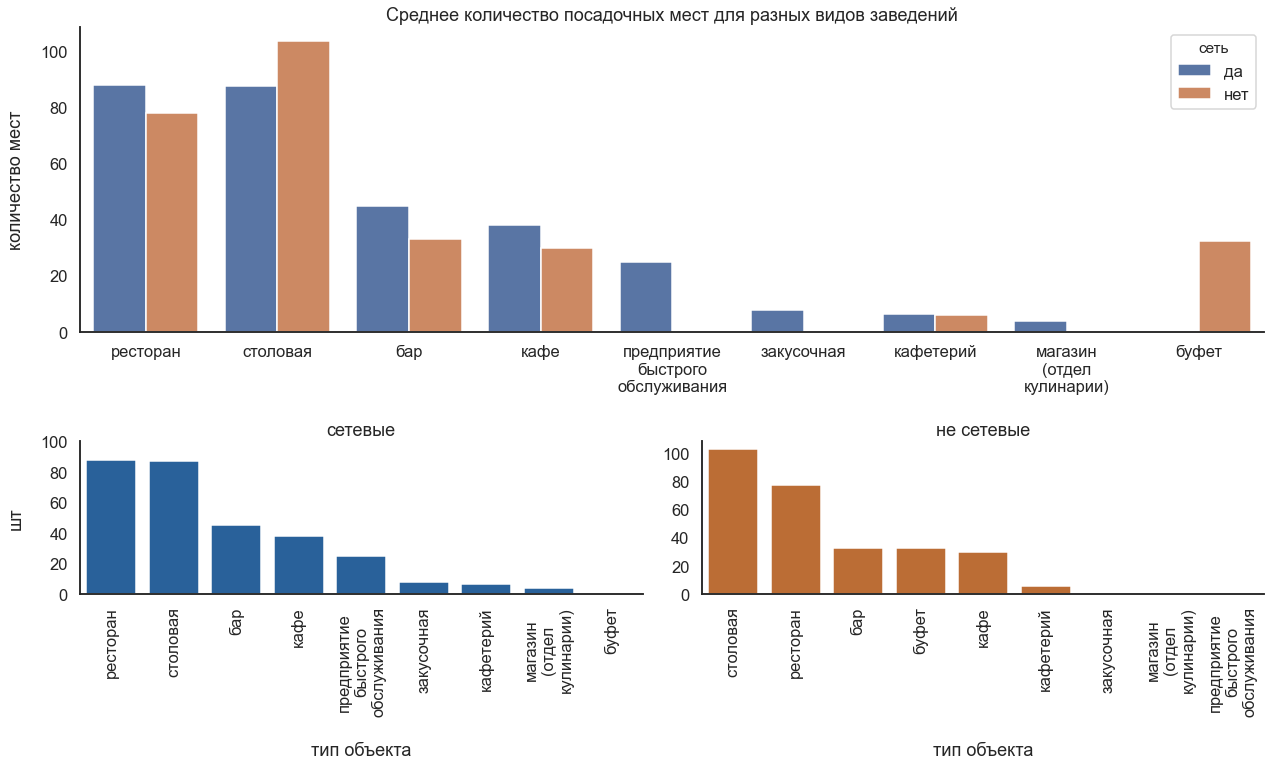

In [141]:
order = list(mean_number[mean_number['сеть']=='да'].sort_values('число мест (медиана)',ascending=False)['тип заведения'])

sns.set(style='white', context='talk')
fg = plt.figure(figsize=(18, 11))
gs = gridspec.GridSpec(ncols=2, nrows=2, figure=fg, height_ratios=[2,1])

fig_ax = fg.add_subplot(gs[0, 0:2])
sns.barplot(data=mean_number, x='тип заведения', y='число мест (медиана)', hue='сеть', order=order)
plt.title("Среднее количество посадочных мест для разных видов заведений")
plt.xlabel("")
plt.ylabel("количество мест", labelpad=15)

fig_ax = fg.add_subplot(gs[1, 0])
sns.barplot(data=mean_number[mean_number['сеть']=='да'], x='тип заведения', y='число мест (медиана)',
            order=order, color='#1661ad')
plt.title("сетевые")
plt.xlabel("тип объекта", labelpad=25)
plt.ylabel("шт", labelpad=15)
plt.xticks(rotation=90)
plt.yticks(np.arange(0,120,20))

fig_ax = fg.add_subplot(gs[1, 1])
sns.barplot(data=mean_number[mean_number['сеть']=='нет'].sort_values('число мест (медиана)',ascending=False),
            x='тип заведения', y='число мест (медиана)', color='chocolate')
plt.title("не сетевые")
plt.xlabel("тип объекта", labelpad=25)
plt.ylabel("")
plt.xticks(rotation=90)
plt.yticks(np.arange(0,120,20))

sns.despine(bottom=False)
plt.tight_layout(h_pad=1.5)

if work_place!=3:
    fg.savefig(PATH_TO_FOLDER_DICT[work_place]+'plot\\15_bar_chain_vs_not_chain_median')

Больше всего от расчета медианы вместо среднего пострадали не сетевые столовые, видимо для них характерны несколько очень вместительных.

Для сетевых и несетевых заведений число посадочных мест для самых популярных типов отличается не сильно. Так, столовые обычно вмещают 90-100 человек, рестораны - около 80, а кафе и бары - 40 и 50 человек соответственно. Для несетевых заведений такой же вместительностью обладают буфеты.

В основном сетевые заведения немного вместительнее. Кроме столовых. Не сетевые столовые вместительнее на 20% при сравнении средних значений и около 15% для медианы.

Самые уютные заведения относятся к кафетериям и закусочным, в них или несколько посадочных мест, либо их нет вовсе, как нет их в отделах кулинарии.

Интересно, что для сетевых заведений с типом предприятие быстрого обслуживания число посадочных мест около 20, а в не сетевых еденицы, а в половине нет совсем. И такакя же ситуация с буфетами, но тут преимущество у не сетевых заведений. Буфет не сильно отличается от предприятия быстрого обслуживания, по сути им и являясь. Если считать их одним типом, то соотношение посадочных мест сетевых и не сетевых заведений будет очень похоже на соотношение для столовых...

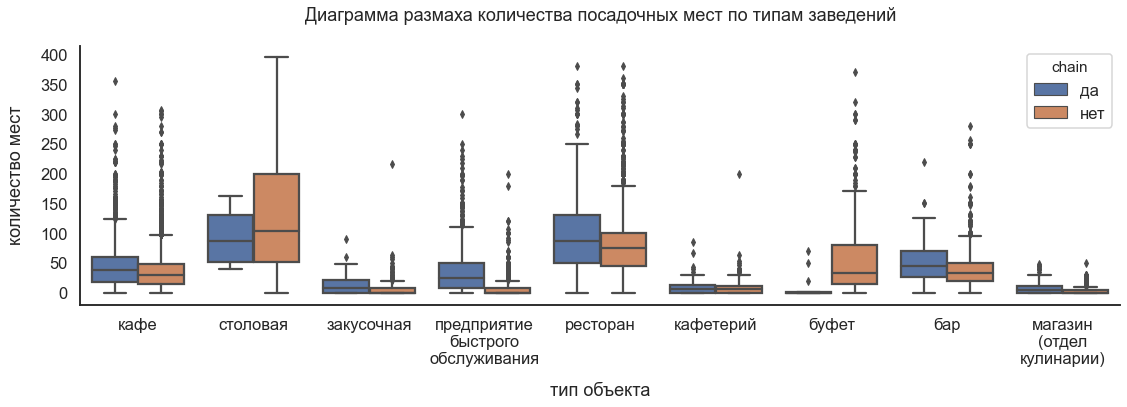

In [142]:
rest_data_cut = rest_data[rest_data['number']<400].copy()

sns.set(style='white', context='talk')
fg = plt.figure(figsize=(16, 6))
sns.boxplot(x='object_type_for_plot', y='number', data=rest_data_cut, hue='chain', hue_order=['да','нет'])
plt.title("Диаграмма размаха количества посадочных мест по типам заведений", pad=25)
plt.xlabel("тип объекта", labelpad=15)
plt.ylabel("количество мест", labelpad=15)
plt.yticks(np.arange(0,450,50))
sns.despine(bottom=False)
plt.tight_layout()
if work_place!=3:
    fg.savefig(PATH_TO_FOLDER_DICT[work_place]+'plot\\16_box_chain_vs_not_chain')

...На ящике с усами видно за счет чего достигатеся вместительность не сетевых столовых. Нормальным считается количество до 400 мест, тогда как для сетевых столовых этот показатель менее 200. У ресторанов медиана очень близка, но нормальная вместительность сетевых выше на 50 мест.

**Топ-10 улиц по количеству объектов общественного питания. В каких районах Москвы находятся эти улицы?**

In [143]:
streets_data                                       = rest_data[['chain','object_type','address','number',
                                                                'object_type_for_plot','object_type_top_five']].copy()
streets_data['short_address']                      = streets_data['address'].apply(split_address)
no_street_index                                    = streets_data[streets_data['short_address'].isna()].index
streets_data.loc[no_street_index, 'short_address'] = streets_data.loc[no_street_index, 'address'
                                                                     ].apply(lambda x: x[-2:]
                                                                             if 'дом' in x.split(', ')[-1]
                                                                             else "")
index_to_rotate                                    = streets_data[streets_data['address'].str.contains('километр')].index
streets_data.loc[index_to_rotate, 'short_address'] = streets_data.loc[index_to_rotate, 'short_address'].apply(rotate_km)
streets_data['street_name']                        = streets_data['short_address'].apply(lambda x: x.split(', ')[0])
objects_amount                                     = streets_data.groupby('street_name', as_index=False
                                                                         ).agg({'object_type':'count'}
                                                                              ).sort_values('object_type', ascending=False)
objects_amount.columns                             = ['улица', 'количество заведений']
top_ten_streets                                    = objects_amount.head(10)
top_ten_streets                                    = top_ten_streets.set_index(np.arange(1,11))
display(top_ten_streets)

if work_place!=3:
    dfi.export(top_ten_streets, PATH_TO_FOLDER_DICT[work_place]+'df\\4_top_ten_streets.png')

,улица,количество заведений
1,проспект Мира,197
2,Профсоюзная улица,180
3,Ленинградский проспект,172
4,Пресненская набережная,165
5,Варшавское шоссе,163
6,Ленинский проспект,136
7,проспект Вернадского,128
8,город Зеленоград,128
9,Кутузовский проспект,114
10,Каширское шоссе,109


Мы получили 10 улиц, с наибольшим количеством заведений. Но это пока нам не сильно поможет. Дело в том, что многие из них - очень длинные улицы, они не только проходят через несколько районов, но и зачастую пересекают несколько административных округов. То есть просто по названию улицы мы не можем определить насколько близко или удаленно заведение от центра и не можем сказать точно в каком именно районе она проходит. Ленинский проспект начинается от садового кольца и тянется до МКАД. То есть, выбрав проспект Мира, Профсоюзню улицу или Ленинский проспектс почти двумя сотнями заведений, хотелось бы понимать где именно эти заведения находятся. Растянуты по всему проспекту или сконцентрированы ближе к центру.

Функция `district_definition` обращается к ресурсу MoscowMap и получает информацию по району и округу для выбранной улицы. Результат сначала сохраняется в словарь, а затем в датафрейм `top_ten_streets_info`. Поскольку поиск уже совершен и данные сохранены, ниже, при любом выборе будет произведена загрузка уже сохраненного датафрейма. Код ниже (и функция `district_definition`) показывают как данные были собраны.

In [144]:
request = 0
while request not in [1,2]:
    request = int(input('1 - поиск информации в интернете;\n2 - скачать top_ten_streets.csv\n'))
    if request == 1 and work_place != 3:
        errors        = []
        distr_dict    = {}
        requests_list = list(top_ten_streets['улица'])
        for request in requests_list:
            try:
                district_definition (request)
            except:
                errors.append(request)

        top_ten_streets_info           = pd.DataFrame([distr_dict]).T.reset_index()
        top_ten_streets_info.columns   = ['улица','словарь данных']
        top_ten_streets_info['районы'] = top_ten_streets_info['словарь данных'].apply(lambda x: ', '.join(list(x.keys())))
        top_ten_streets_info['округа'] = top_ten_streets_info['словарь данных'].apply(lambda x: ', '.join(set(x.values())))
        top_ten_streets_info.drop(columns='словарь данных', inplace=True)
        top_ten_streets_info['районы'] = top_ten_streets_info['районы'].apply(address_translit)
        top_ten_streets_info['округа'] = top_ten_streets_info['округа'].apply(address_translit)
        top_ten_streets_info           = top_ten_streets.merge(top_ten_streets_info, on='улица').set_index(np.arange(1,11))
        top_ten_streets_info.to_csv(PATH_TO_FOLDER_DICT[work_place]+'top_ten_streets_info.csv', index=False)
        
    elif request == 1 and work_place == 3:
        print(colored("Ни к чему тратить время на запросы, все уже готово",'red'))
        request = 2
 
    if request == 2:
        top_ten_streets_info = pd.read_csv(top_ten_streets_url)
        print(colored('Файл top_ten_streets_info.csv загружен в DataFrame top_ten_streets_info', 'green'))

1 - поиск информации в интернете;
2 - скачать top_ten_streets.csv
2
Файл top_ten_streets_info.csv загружен в DataFrame top_ten_streets_info


In [145]:
top_ten_streets_info = top_ten_streets_info[['округа','районы','улица','количество заведений']].set_index(np.arange(1,11))
display(top_ten_streets_info)
if work_place!=3:
    dfi.export(top_ten_streets_info, PATH_TO_FOLDER_DICT[work_place]+'df\\2_top_ten_streets_info.png')

,округа,районы,улица,количество заведений
1,"цао, свао","мещанский, алексеевский, марыина-роща, останкинский, ростокино, ярославский",проспект Мира,197
2,юзао,"академический, конково, обручевский, теплый-стан, черемушки, ясенево",Профсоюзная улица,180
3,"цао, сао","тверской, аэропорт, беговой, сокол, хорошевский",Ленинградский проспект,172
4,цао,пресненский,Пресненская набережная,165
5,"юао, юзао","донской, нагатино-садовники, нагорный, чертаново-северное, чертаново-центральное, чертаново-южное, бутово-северное, бутово-южное",Варшавское шоссе,163
6,"цао, юао, юзао, зао","якиманка, донской, гагаринский, ломоносовский, обручевский, теплый-стан, проспект-вернадского",Ленинский проспект,136
7,"юзао, зао","ломоносовский, проспект-вернадского, раменки, тропарево-никулино",проспект Вернадского,128
8,"цао, зао","арбат, пресненский, дорогомилово, фили-давыдково",Кутузовский проспект,114
9,юао,"москворечье-сабурово, нагатино-садовники, нагорный, орехово-борисово-северное, орехово-борисово-южное",Каширское шоссе,109
10,юао,"чертаново-северное, чертаново-центральное, чертаново-южное",Кировоградская улица,107


Как и мы и говорили, самый богатый на заведения проспект Мира проходит через шесть районов и два административных округа. Единственная улица, попавшая в топ-10 и уместившаяся в один район и один округ это Пресненская набережная. Остальные улицы проходят через минимум три района.

Попробуем определять район и административный округ google geocoding api. api yandex карт такую информацию дает тоже, но я с ним не разбирался пока, поскольку беглое изучение документации говорит, что результат необходимо выводить на картах, а нам это не надо и количество бесплатных запросов меньше.

In [146]:
print("Количество строк в датасете   {}\nКоличество уникальных адресов {}".
      format(len(streets_data), streets_data['address'].nunique()))

Количество строк в датасете   15191
Количество уникальных адресов 9091


Чтобы не делать лишних запросов, они бесплатны только до определенного количества, да и сэкономить время, нам нужно сделать 9000 запросов, а не 15000, результат запишем в словарь, а уж потом внесем данные в наш датасет.

С целью уложиться в квоты все запросы сделаны один раз, результат сохранен в датафрейм `district_info` и залиты в облако. Запуск проекта при проверке не вызовет обращений к google geocoding api, только к облаку, для загрузки `district_info`.

In [147]:
request = 0
while request not in [1,2]:
    request = int(input('1 - cделать запрос к api google distance;\n2 - скачать distance_info.csv\n'))
    API_KEY = ''
    if request == 1 and API_KEY != '':
        # формирование словаря district_info_dict на основе уникальных адресов.
        addresses = list(set(streets_data['address']))
        for address in addresses:
            district_info_dict.setdefault(address,[])    
        print(colored("Создано {} ключей словаря".format(len(district_info_dict)),"green"))
            
        if sorted(addresses) == sorted(list(district_info_dict.keys())):
            print(colored("Все адреса попали в ключи словаря",'green'))
            # заполнение словаря 
            not_found_list = []
            for address in addresses:
                district_info_dict[address] = district_info_def(address)
            for k in district_info_dict:
                if district_info_dict[k] == 'не найдено':
                    not_found_list.append(k)
            if not_found_list == []:
                print(colored("Все данные занесены в словарь",'green'))
            else:
                print(colored("Следует проверить "+str(len(not_found_list))+' адресов','red'))
        else:
                print(colored("Проверить внесение адресов в ключи словаря!",'red'))
                    
        district_info                           = pd.DataFrame(columns=['адрес']) 
        district_info['адрес']                  = streets_data['address'].copy()  
        district_info['административный округ'] = district_info['адрес'].apply(adm_district)
        district_info['район']                  = district_info['адрес'].apply(district)
        district_info.to_csv(PATH_TO_FOLDER_DICT[work_place]+'district_info.csv', index=False)
        
    elif request == 1 and API_KEY == '':
        print(colored("Ни к чему тратить время на запросы, все уже готово",'red'))
        request = 2
 
    if request == 2:
        district_info = pd.read_csv(district_info_url)
        print(colored('Файл district_info.csv загружен в DataFrame district_info', 'green'))

1 - cделать запрос к api google distance;
2 - скачать distance_info.csv
2
Файл district_info.csv загружен в DataFrame district_info


In [148]:
district_info.head()

,адрес,административный округ,район
0,"город Москва, улица Егора Абакумова, дом 9",Северо-Восточный административный округ,Ярославский
1,"город Москва, улица Талалихина, дом 2/1, корпус 1",Центральный административный округ,Таганский
2,"город Москва, Абельмановская улица, дом 6",Центральный административный округ,Таганский
3,"город Москва, Абрамцевская улица, дом 1",Северо-Восточный административный округ,Лианозово
4,"город Москва, Абрамцевская улица, дом 9, корпус 1",Северо-Восточный административный округ,Лианозово


In [149]:
[x for x in set(streets_data['address']) if x not in set(district_info['адрес'])]

['город Москва, поселение Рязановское, посёлок Фабрики имени 1 Мая, дом 45А']

Каким-то образом при сборе данных мы потеряли один адрес. Исправим эту маленькую ошибку.

In [150]:
max_index = district_info.index[-1]+1
district_info.loc[max_index, 'адрес']       = 'город Москва, поселение Рязановское, посёлок Фабрики имени 1 Мая, дом 45А'
district_info.loc[max_index,
                  'административный округ'] = 'Новомосковский административный округ'
district_info.loc[max_index, 'район']       = 'Рязановское, Поселение'
district_info                               = district_info.sort_values(by='адрес').reset_index(drop=True)
streets_data                                = streets_data.sort_values(by='address').reset_index(drop=True)

merged_data                                 = streets_data[['address','street_name','object_type','chain','number']].copy()
merged_data.columns                         = ['адрес','улица','тип заведения','сетевой','посадочных мест']
merged_data                                 = merged_data.merge(district_info,
                                                                how='left', on='адрес',
                                                                left_index=True,
                                                                right_index=True)
merged_data.isna().sum()

адрес                      0
улица                      0
тип заведения              0
сетевой                    0
посадочных мест            0
административный округ     9
район                     57
dtype: int64

Из более 9000 уникальных адресов у нас 56 не найденных района и 8 административнх округов. Обработаем эти пропуски.

In [151]:
merged_data[merged_data['административный округ'].isna()]

,адрес,улица,тип заведения,сетевой,посадочных мест,административный округ,район
489,"город Москва, 28-й километр Московской Кольцевой Автодороги, владение 7",МКАД,кафе,нет,48,NaN,Куркино
597,"город Москва, 30-й километр Московской Кольцевой Автодороги, владение 6",МКАД,закусочная,нет,12,NaN,Куркино
720,"город Москва, 73-й километр Московской Кольцевой Автодороги, дом 7",МКАД,ресторан,да,90,NaN,Куркино
721,"город Москва, 73-й километр Московской Кольцевой Автодороги, дом 7, корпус 1",МКАД,ресторан,нет,70,NaN,Куркино
722,"город Москва, 74-й километр Московской Кольцевой Автодороги, владение 4",МКАД,кафе,да,8,NaN,NaN
723,"город Москва, 74-й километр Московской Кольцевой Автодороги, владение 4, строение 1",МКАД,ресторан,да,20,NaN,NaN
2489,"город Москва, Волгоградский проспект, домовладение 24, корпус 1",Волгоградский проспект,предприятие быстрого обслуживания,да,90,NaN,NaN
12820,"город Москва, улица Земляной Вал, дом 9",улица Земляной Вал,бар,нет,130,NaN,Митино
15190,"улица Сергея Макеева, дом 9, строение 2",улица Сергея Макеева,кафе,нет,15,NaN,NaN


In [152]:
adm_districts_to_fill = list(set(merged_data[(merged_data['административный округ'].isna()) &
                                            ~(merged_data['район'].isna())]['район']))

adm_districts_to_fill

['Куркино', 'Митино']

In [153]:
mitino_adm_distr  = list(set(merged_data[~(merged_data['административный округ'].isna()) &
                                          (merged_data['район']=='Митино')]['административный округ']))
kurkino_adm_distr = list(set(merged_data[~(merged_data['административный округ'].isna()) &
                                          (merged_data['район']=='Куркино')]['административный округ']))

mitino_indexes  = list(merged_data[(merged_data['административный округ'].isna()) &
                                   (merged_data['район']=='Митино')].index)
merged_data.loc[mitino_indexes, 'административный округ'] = mitino_adm_distr

kurkino_indexes = list(merged_data[(merged_data['административный округ'].isna()) &
                                   (merged_data['район']=='Куркино')].index)
merged_data.loc[kurkino_indexes, 'административный округ'] = kurkino_adm_distr[0]

merged_data[merged_data['административный округ'].isna()]

,адрес,улица,тип заведения,сетевой,посадочных мест,административный округ,район
722,"город Москва, 74-й километр Московской Кольцевой Автодороги, владение 4",МКАД,кафе,да,8,NaN,NaN
723,"город Москва, 74-й километр Московской Кольцевой Автодороги, владение 4, строение 1",МКАД,ресторан,да,20,NaN,NaN
2489,"город Москва, Волгоградский проспект, домовладение 24, корпус 1",Волгоградский проспект,предприятие быстрого обслуживания,да,90,NaN,NaN
15190,"улица Сергея Макеева, дом 9, строение 2",улица Сергея Макеева,кафе,нет,15,NaN,NaN


Эти три адреса заполнить из имеющихся данных не получится. Посмотрим в поисковике и заполним вручную.

In [154]:
volgogradsky_index = merged_data[(merged_data['административный округ'].isna()) &
                                 (merged_data['адрес'].str.contains('Волгоградский проспект'))].index
merged_data.loc[volgogradsky_index, 'административный округ'] = 'Юго-Восточный административный округ'
merged_data.loc[volgogradsky_index, 'район']                  = 'Южнопортовый'

mkad_74_index = merged_data[merged_data['административный округ'].isna()].index

merged_data.loc[mkad_74_index, 'административный округ']      = 'Северо-Западный административный округ'
merged_data.loc[mkad_74_index, 'район']                       = 'Северное Тушино'
merged_data[merged_data['административный округ'].isna()]

,адрес,улица,тип заведения,сетевой,посадочных мест,административный округ,район


In [155]:
print('{} строки не содержит данные в столбце с названием района'.format(len(merged_data[merged_data['район'].isna()])))

53 строки не содержит данные в столбце с названием района


In [156]:
moscovskiy_adm_distr = list(set(merged_data[(merged_data['адрес'].str.contains('город Московский')) &
                                                     ~(merged_data['район'].isna())]['административный округ']))[0]
moscovskiy_distr     = list(set(merged_data[(merged_data['адрес'].str.contains('город Московский')) &
                                                     ~(merged_data['район'].isna())]['район']))[0]
moscovskiy_indexes   = list(merged_data[merged_data['адрес'].str.contains('город Московский')].index)
merged_data.loc[moscovskiy_indexes, 'административный округ'] = moscovskiy_adm_distr
merged_data.loc[moscovskiy_indexes, 'район']                  = moscovskiy_distr

balashicha_indexes            = list(merged_data[merged_data['административный округ']=='город Балашиха'].index)
merged_data.loc[balashicha_indexes, 'район'] = 'город Балашиха'

proektiruemiy_indexes         = list(merged_data[merged_data['адрес'].str.contains('4062')].index)
proektiruemiy_district        = 'Даниловский'
proektiruemiy_adm_district    = 'Южный административный округ'
merged_data.loc[proektiruemiy_indexes, 'административный округ'] = proektiruemiy_adm_district
merged_data.loc[proektiruemiy_indexes, 'район'] = proektiruemiy_district

zelenograd_indexes  = list(merged_data[merged_data['адрес'].str.contains('Зеленоград')].index)
zelenograd_district = list(set(merged_data[(merged_data['улица']=='Берёзовая аллея') &
                                                     (merged_data['адрес'].str.contains('Зеленоград'))]['район']))[1]
zelenograd_indexes  = merged_data[(merged_data['улица']=='Берёзовая аллея') &
                                  (merged_data['адрес'].str.contains('Зеленоград') &
                                  (merged_data['район'].isna()))].index
merged_data.loc[zelenograd_indexes, 'административный округ'] = 'Зеленоградский административный округ'
merged_data.loc[zelenograd_indexes, 'район']                  = zelenograd_district

dzerjinsky_indexes = merged_data[merged_data['административный округ']=='город Дзержинский'].index
merged_data.loc[dzerjinsky_indexes, 'район'] = 'город Дзержинский'

rabochaya_indexes = list(merged_data[merged_data['адрес'].str.contains('город Москва, Рабочая улица')].index)
rabochaya_district                                          = 'Таганский'
rabochaya_adm_district                                      = 'Центральный административный округ'
merged_data.loc[rabochaya_indexes, 'район']                 = rabochaya_district
merged_data.loc[rabochaya_indexes,'административный округ'] = rabochaya_adm_district

eneseiskaya_indexes = list(merged_data[merged_data['адрес'].str.contains('Енисейская улица')].index)
eneseiskaya_district                                           = 'Бабушкинский'
eneseiskaya_adm_district                                       = 'Северо-Восточный административный округ'
merged_data.loc[eneseiskaya_indexes, 'район']                  = eneseiskaya_district
merged_data.loc[eneseiskaya_indexes, 'административный округ'] = eneseiskaya_adm_district

print('{} строк не содержит данные в столбце с названием района'.format(len(merged_data[merged_data['район'].isna()])))

26 строк не содержит данные в столбце с названием района


Осталось 24 строки без района. 24 строки из 15000. Менее 1%. Удалю их. Самые "ресторанные" улицы мы уже нашли и среди строк с пропущенными данными этих улиц нет. Удаление этих строк может сказаться только на определении улиц с одним заведением, но их и так достаточно))

In [157]:
old_len = len(merged_data)
merged_data.drop(index=merged_data[merged_data['район'].isna()].index, inplace=True)
print('Удалено {} строки'.format(old_len-len(merged_data)))
print('{} строк не содержит данные в столбце с названием района'.format(len(merged_data[merged_data['район'].isna()])))

Удалено 26 строки
0 строк не содержит данные в столбце с названием района


In [158]:
len(merged_data[~(merged_data['административный округ'].str.contains('административный округ'))])

86

Еще 153 строки не содержат словосочетание 'административный округ' в столбце 'административный округ'. Для адресов за пределами Москвы это нормально и может содержать название района, но для адресов в Москве это ошибка.

In [159]:
merged_data[~(merged_data['административный округ'].str.contains('административный округ'))].head()

,адрес,улица,тип заведения,сетевой,посадочных мест,административный округ,район
32,"Полевая улица, дом 20",Полевая улица,столовая,нет,205,не найдено,не найдено
34,"Проектируемый проезд N 5231, дом 8, строение 3",Проектируемый проезд N 5231,буфет,нет,20,не найдено,не найдено
72,"город Москва, 1-й Дорожный проезд, дом 1",1-й Дорожный проезд,кафе,нет,110,Чертаново Центральное,Чертаново Центральное
731,"город Москва, 82-й километр Московской Кольцевой Автодороги, владение 18",МКАД,кафе,нет,90,город Дзержинский,город Дзержинский
732,"город Москва, 82-й километр Московской Кольцевой Автодороги, владение 18",МКАД,кафе,да,94,город Дзержинский,город Дзержинский


In [160]:

moskovskiy_indexes = merged_data[merged_data['адрес'].str.contains('город Московский')].index
merged_data.loc[moskovskiy_indexes, 'административный округ'] = 'Новомосковский административный округ'

merged_data['административный округ'] = merged_data['административный округ'
                                                   ].apply(lambda x:x.replace('Аутономус Область',
                                                                              'административный округ'))
merged_data['административный округ'] = merged_data['административный округ'
                                                   ].apply(lambda x:x.replace('perovo','Восточный административный округ'))

merged_data['административный округ'] = merged_data['административный округ'
                                                   ].apply(lambda x:x.replace('Бибирево',
                                                                              'Северо-Восточный административный округ'))
merged_data['административный округ'] = merged_data['административный округ'
                                                   ].apply(lambda x:x.replace('Бабушкинский',
                                                                              'Северо-Восточный административный округ'))
merged_data['административный округ'] = merged_data['административный округ'
                                                   ].apply(lambda x:x.replace('Останкинский',
                                                                              'Северо-Восточный административный округ'))
merged_data['административный округ'] = merged_data['административный округ'
                                                   ].apply(lambda x:x.replace('Таганский',
                                                                              'Центральный административный округ'))

Теперь наконец перейдем к цели данного шага и выясним на каких улицах и в каких районах расположено больше всего заведений.

In [161]:
top_ten_streets_amount = merged_data.groupby(['административный округ','район','улица'], as_index=False
                                                   ).agg({'адрес':'count'}
                                                        ).sort_values('адрес',ascending=False
                                                                     ).head(10).set_index(np.arange(1,11))
top_ten_streets_amount['административный округ'] = top_ten_streets_amount['административный округ'
                                                                         ].apply(lambda x: x.replace(' административный округ', ''))

top_ten_streets_amount.columns = ['административный округ', 'район', 'улица', 'количество заведений']
top_ten_streets_amount

if work_place!=3:
    dfi.export(top_ten_streets_amount, PATH_TO_FOLDER_DICT[work_place]+'df\\3_top_ten_streets_amount.png')

In [162]:
[x for x in list(top_ten_streets_amount['улица']) if x in list(top_ten_streets['улица'])]

['Пресненская набережная']

Список самых ресторанных улиц поменялся на 90% после того, как мы разделили улицы на районы. Из прежнего списка в лидерах осталась лишь Пресненская набережная.

Похоже, что на длинных улицах заведения распределены более менее равномерно, нет какого-то одного района в котором сосредоточены все заведения.

60% улиц расположены в центральном административном округе.

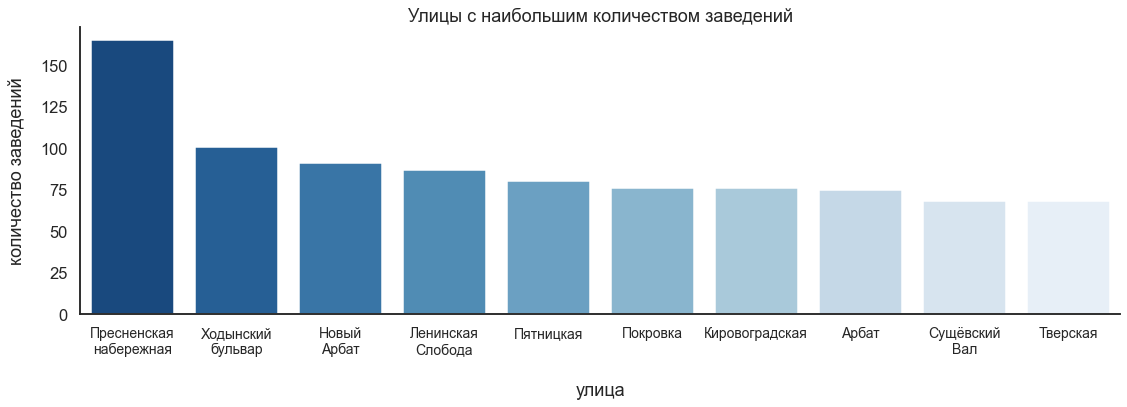

In [163]:
data          = top_ten_streets_amount.copy()
data['улица'] = data['улица'].apply(lambda x: x.replace('улица',''))
data['улица'] = data['улица'].apply(lambda x: x.strip())
data['улица'] = data['улица'].apply(lambda x: x.replace(' ','\n'))

sns.set(style="white", context='talk')
fg = plt.figure(figsize=(16, 6))

sns.barplot(data=data, x='улица', y='количество заведений', palette="Blues_r")

plt.title("Улицы с наибольшим количеством заведений")
plt.xlabel("улица", labelpad=25)
plt.ylabel("количество заведений", labelpad=15)
sns.despine(bottom=False)
plt.xticks(fontsize=14)
plt.tight_layout()
if work_place!=3:
    fg.savefig(PATH_TO_FOLDER_DICT[work_place]+'plot\\17_top_ten')

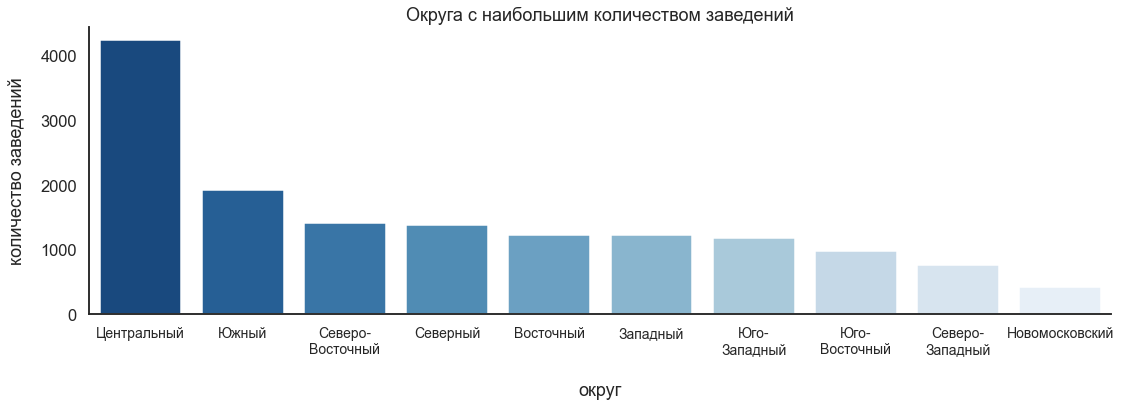

In [164]:
adm_districts_rating = merged_data.groupby(['административный округ'], as_index=False
                                                                  ).agg({'адрес':'count'}
                                                                       ).sort_values('адрес',ascending=False
                                                                                    ).head(10).set_index(np.arange(1,11))
adm_districts_rating['административный округ'] = adm_districts_rating['административный округ'
                                                             ].apply(lambda x: x.replace(' административный округ', ''))
adm_districts_rating.columns                   = ['административный округ', 'количество заведений']
data                                           = adm_districts_rating.copy()
data['административный округ']                 = data['административный округ'].apply(lambda x: x.replace('-','-\n'))

sns.set(style="white", context='talk')
fg = plt.figure(figsize=(16, 6))

sns.barplot(data=data, x='административный округ', y='количество заведений', palette="Blues_r")

plt.title("Округа с наибольшим количеством заведений")
plt.xlabel("округ", labelpad=25)
plt.ylabel("количество заведений", labelpad=15)
sns.despine(bottom=False)
plt.xticks(fontsize=14)
plt.tight_layout()
if work_place!=3:
    fg.savefig(PATH_TO_FOLDER_DICT[work_place]+'plot\\18_top_ten_adm_distr')

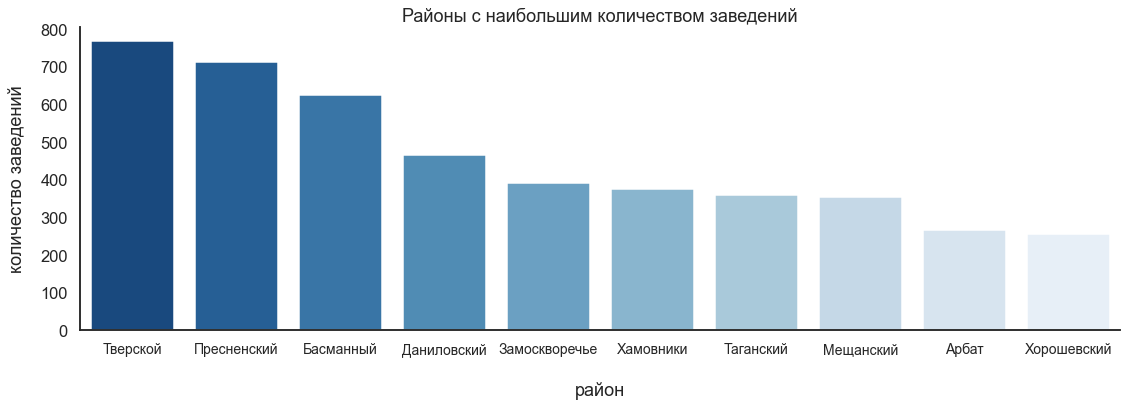

In [165]:
districts_rating = merged_data.groupby(['район'], as_index=False).agg({'адрес':'count'}
                                                                     ).sort_values('адрес',ascending=False
                                                                                  ).head(10).set_index(np.arange(1,11))

districts_rating.columns = ['район', 'количество заведений']

data = districts_rating.copy()

sns.set(style="white", context='talk')
fg = plt.figure(figsize=(16, 6))

sns.barplot(data=data, x='район', y='количество заведений', palette="Blues_r")

plt.title("Районы с наибольшим количеством заведений")
plt.xlabel("район", labelpad=25)
plt.ylabel("количество заведений", labelpad=15)
sns.despine(bottom=False)
plt.xticks(fontsize=14)
plt.tight_layout()
if work_place!=3:
    fg.savefig(PATH_TO_FOLDER_DICT[work_place]+'plot\\19_top_ten_distr')

**Число улиц с одним объектом общественного питания. В каких районах Москвы находятся эти улицы?**

In [166]:
few_rest_streets = merged_data.groupby(['улица'], as_index=False
                                      ).agg({'адрес':'count'}).sort_values('адрес')
few_rest_streets = few_rest_streets.query('адрес == 1')
streets          = list(set(few_rest_streets['улица']))

print('Количество улиц, на которых есть только одно заведение - {}'.format(len(streets)))

Количество улиц, на которых есть только одно заведение - 567


In [167]:
districts = list(set(merged_data[merged_data['улица'].isin(streets)]['район']))
print('Количество районов, на которых находятся улицы с одним заведением - {}'.format(len(districts)))

Количество районов, на которых находятся улицы с одним заведением - 127


**Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания**


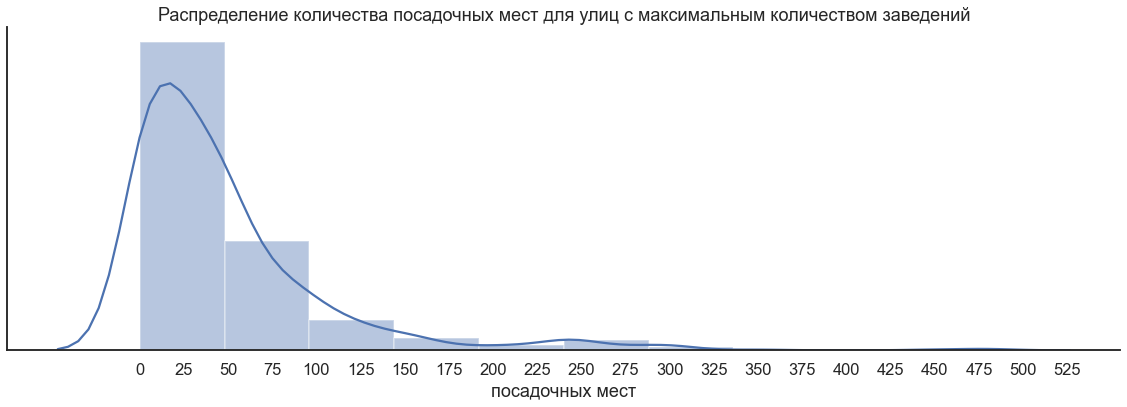

In [168]:
sns.set(style="white", context='talk')
fg = plt.figure(figsize=(16, 6))

number_dist_df = merged_data[merged_data['улица'].isin(list(top_ten_streets_amount['улица']))]
sns.distplot(number_dist_df["посадочных мест"], bins=10)
plt.title('Распределение количества посадочных мест для улиц с максимальным количеством заведений')
plt.xticks(np.arange(0,550,25))
plt.yticks([])
sns.despine(bottom=False)
plt.tight_layout()
if work_place!=3:
    fg.savefig(PATH_TO_FOLDER_DICT[work_place]+'plot\\20_dist_number')

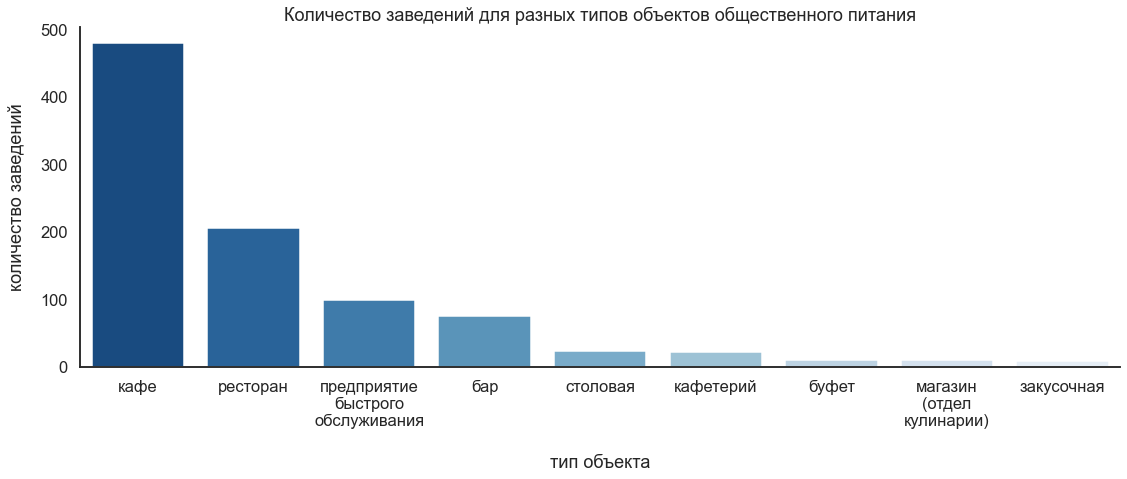

In [169]:
types_amount         = number_dist_df.groupby('тип заведения', as_index=False
                                             ).agg({'адрес':'count'}).sort_values('адрес', ascending=False
                                                                                 ).set_index(np.arange(1,10))

types_amount.columns          = ['тип заведения', 'количество']
types_amount['тип заведения'] = types_amount['тип заведения'].apply(lambda x: x.replace('предприятие быстрого обслуживания',
                                                                                        'предприятие\nбыстрого\nобслуживания'))
types_amount['тип заведения'] = types_amount['тип заведения'].apply(lambda x: x.replace('магазин (отдел кулинарии)',
                                                                                        'магазин\n(отдел\nкулинарии)'))
sns.set(style="white", context='talk')
fg = plt.figure(figsize=(16, 7))

sns.barplot(data=types_amount, x='тип заведения', y='количество', palette="Blues_r")
plt.title("Количество заведений для разных типов объектов общественного питания")
plt.xlabel("тип объекта", labelpad=25)
plt.ylabel("количество заведений", labelpad=15)

sns.despine(bottom=False)
plt.tight_layout()

if work_place!=3:
    fg.savefig(PATH_TO_FOLDER_DICT[work_place]+'plot\\21_bar_object_types')

Выше, при описании среднего количества посадочных мест для каждого вида объекта общественного питания мы установили, что среднее количество посадочных мест для кафе составляет до 40 человек, ресторанов - до 80-90 человек.

Распределение количества посадочных мест соответсвует распределению типов заведений. Большинство заведений - кафе и мы видим, что в основном количество мест на распределении как раз до 50 человек. Второе по частоте значение в распределении - от 50 до 100 посадочных мест, что соответствует среднему количеству посадочных мест для ресторанов.

Говоря о рекомендациях, я бы отметил как привлекательные для нас, два типа заведений: бар или столовая. Да, кафе и ресторан более популярны и распространены, но это лишь означает большую конкуренцию.

Доля кафе среди несетевых заведений почти 40%, а среди сетевых - почти 50%. То есть открывая новое кафе, мы сходу конкурируем с самыми распространенными сетевыми и не сетевыми заведениями. Учитывая, что наш бизнес план подразумевает очень интересное, но непроверенное нововведение - обслуживание роботами, быть уверенным, что клиенты оценят и перейдут из полюбившихся сетей к нам, мы не можем.

Бар во всех смыслах нам подходит больше. Для баров среднее количество посадочных мест примерно равно этому показателю для кафе. Тут лишних расходов не будет. Количество баров в центральном административном округе в пять раз меньше чем кафе и среди сетевых заведений практически нет баров. Тут мы попадаем на менее конкурентное поле. Это плюс.

Так же мне кажется, что технически робот, стоящий за барной стойкой, подключенный к бутылкам и разливающий напитки, более прост в реализации, чем роботы, которые понадобились бы нам в кафе. Робот в баре может быть стационарным, иметь базу данных напитков и возможных коктейлей на основе этих напитков, быть подключенным к бутылкам и интернету). Робот же для кафе наверное должен быть более функционален. Как минимум уметь не сшибая все вокруг добраться до столика, принять заказ и доставить его по готовности. В баре клиенты сами ходят к стойке. Так что второй плюс - меньшие расходы на техническую часть.

Третим плюсом можно считать "вау эфект". Мне кажется, что именно в баре, робот-бармен произведет максимум эфекта. Кроме того взаимодействие по заказу коктейля проще, чем взаимодействие по выбору и заказу нескольких блюд, закуски и десерта. Минусом бара можно считать небольшую наполняемость в будни. Все-таки бар это выпивка и это скорее пятница, суббота.

Из минуса варианта бар появляется второй вариант - столовая. Тут по сравнению с кафе можно сделать обслуживание по-проще, чеще всего столовые вообще самообслуживание, это упрощает внедрение роботов, поскольку мы можем делать их опять стационарными. Робот на раздаче и робот на кассе. Для столовой остаются плюсы бара в виде невысокой конкуренции и отсутсвуют минусы малой загрузки в будни. Минусом для столовой будет являться требование к большей площади, чем понадобилась бы нам для бара и как следствие увеличение арендной платы.

По выбору административного округа, я бы предложил центральный. В нем находятся в 2-2,5 раза больше заведений, чем в любом другом округе. Да это конечно конкуренция, но выбрав бар или столовую, мы уровень конкуренции снижаем, а имея ввиду, что у нас роботы, мы должны быть расположены в центре, что бы любой из любопытства мог легко к нам попасть. Никто не поедет смотреть роботов на противоположный конец Москвы. А вот по пути из ресторана зайти выпить рюмочку, а за одно поглядеть на что-то новое, это вот вполне возможно.

Из улиц можно выбирать любую из первой десятки (на самом деле и из второй тоже), кроме Пресненской набережной, на ней на 50% больше заведений, чем на остальных улицах рейтинга. Есть туристические Арбат и Новый Арбат с немалой арендой, но очень проходимые и на них много туристов, для которых, возможно, наши роботы будут дополнительной достопримечательностью.


Презентация: https://yadi.sk/i/ePNXv9Te-5YJKQ